# Table of Contents
1. [Initial Analysis](#Looking-at-International-FIS,-2monthurea/2monthUAN)
2. [Urea Prill Yuz](#Urea-Prill-Yuz)
3. [Urea Gran M East](#Urea-Gran-M-East)
4. [Urea Prill China](#Urea-Prill-China)
5. [Urea-Gran-Egypt](#Urea-Gran-Egypt)
6. [Urea Gran Brazil](#Urea-Gran-Brazil)
7. [Rouen UAN](#Rouen-UAN)

# Looking at International FIS, 2monthurea/2monthUAN 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

original = pd.read_csv("C:/Users/msteinme/Documents/InternationalUrea.csv")
print (original.shape)
original.head()

(685, 13)


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillYuz,UreaGranEast,UANRouen,UreaPrillChina,UreaGranEgypt,UreaGranBrazil
0,8/1/2013,82.336,106.93,467.00,3.415,NaN,NaN,NaN,308,NaN,NaN,NaN,NaN
1,8/2/2013,81.908,106.24,463.75,3.375,77,77,NaN,309,NaN,NaN,NaN,NaN
2,8/5/2013,81.875,105.90,460.50,3.346,NaN,NaN,NaN,305,NaN,NaN,NaN,NaN
3,8/6/2013,81.603,104.76,459.25,3.343,NaN,NaN,NaN,297,NaN,NaN,NaN,NaN
4,8/7/2013,81.287,103.91,458.25,3.272,NaN,NaN,NaN,295,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show>

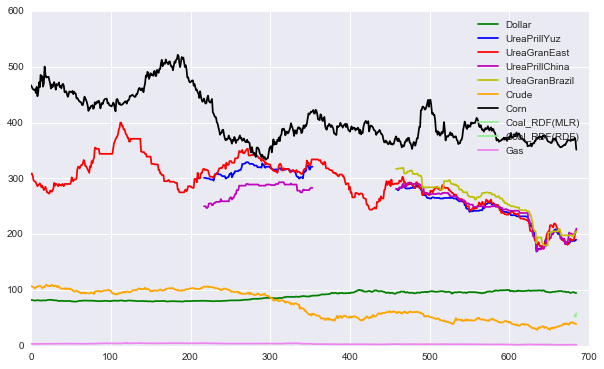

In [2]:
#comparing different countries urea trends
y1 = (original['Dollar'])
y6 = (original['Crude'])
y7 = (original['Corn'])
y8 = (original['Coal_RDF(MLR)'])
y9 = (original['Coal_RDF(RDF)'])
y10 = (original['Gas'])
y2 = (original['UreaPrillYuz'])
y3 = (original['UreaGranEast'])
y4 = (original['UreaPrillChina'])
y5 = (original['UreaGranBrazil'])
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(y1,'g')
ax.plot(y2,'b')
ax.plot(y3,'r')
ax.plot(y4,'m')
ax.plot(y5,'y')
ax.plot(y6,'orange')
ax.plot(y7,'k')
ax.plot(y8,'lightgreen')
ax.plot(y9,'lightgreen')
ax.plot(y10,'violet')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show

In [3]:
original.corr()

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillYuz,UreaGranEast,UANRouen,UreaPrillChina,UreaGranEgypt,UreaGranBrazil
Dollar,1.000000,-0.964485,-0.663102,-0.905450,-0.875990,-0.876971,-0.779910,-0.707525,-0.545666,-0.479163,-0.827814,-0.381939
Crude,-0.964485,1.000000,0.646934,0.899767,0.878869,0.876966,0.844749,0.700341,0.519475,0.598406,0.870320,0.857737
Corn,-0.663102,0.646934,1.000000,0.614611,0.692592,0.690578,0.082322,0.312531,0.306663,0.079334,0.032948,0.307605
Gas,-0.905450,0.899767,0.614611,1.000000,0.803247,0.799158,0.893696,0.781863,0.779276,0.676782,0.917669,0.873264
Coal_RDF(MLR),-0.875990,0.878869,0.692592,0.803247,1.000000,0.998992,0.883195,0.745408,0.632418,0.693413,0.883619,0.828356
Coal_RDF(RDF),-0.876971,0.876966,0.690578,0.799158,0.998992,1.000000,0.863697,0.738823,0.610696,0.675002,0.868151,0.766333
UreaPrillYuz,-0.779910,0.844749,0.082322,0.893696,0.883195,0.863697,1.000000,0.987457,0.812041,0.904320,0.979424,0.985863
UreaGranEast,-0.707525,0.700341,0.312531,0.781863,0.745408,0.738823,0.987457,1.000000,0.774594,0.884485,0.972792,0.974673
UANRouen,-0.545666,0.519475,0.306663,0.779276,0.632418,0.610696,0.812041,0.774594,1.000000,0.817955,0.810231,0.189903
UreaPrillChina,-0.479163,0.598406,0.079334,0.676782,0.693413,0.675002,0.904320,0.884485,0.817955,1.000000,0.861231,0.981139


In [4]:
original.describe()

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillYuz,UreaGranEast,UANRouen,UreaPrillChina,UreaGranEgypt,UreaGranBrazil
count,685.000000,685.000000,685.000000,685.000000,139.000000,139.000000,364.000000,685.000000,195.000000,364.000000,343.000000,227.000000
mean,88.903893,72.101577,407.081387,3.378517,65.881478,65.945891,267.700549,290.794891,183.938462,256.939560,297.064140,258.132159
std,7.625408,26.180188,44.250347,0.867233,10.547816,10.480078,44.328114,45.660815,21.886924,32.754983,53.202652,39.699872
min,79.093000,28.350000,333.500000,1.767000,48.800000,48.800000,169.000000,173.000000,149.000000,170.000000,195.000000,180.000000
25%,80.658000,47.040000,371.500000,2.712000,58.300000,58.319138,240.000000,264.000000,168.000000,244.750000,256.500000,230.000000
50%,88.460000,65.960000,391.000000,3.415000,64.100000,64.100000,265.000000,292.000000,184.000000,264.500000,290.000000,267.000000
75%,96.310000,98.900000,439.500000,4.136000,74.250000,74.250000,309.000000,324.000000,192.000000,287.000000,349.000000,284.000000
max,100.330000,109.520000,521.500000,5.465000,86.500000,86.500000,329.000000,400.000000,229.000000,293.000000,393.000000,319.000000


## Urea Prill Yuz
[Top](#Table-of-Contents)

#### Keeping all of Yuz dates both 2014 and 2016 then I will later separate 

In [11]:
yuz = original[['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','UreaPrillYuz']]
yuz.shape

(685, 8)

In [12]:
yuz = yuz.dropna()
yuznew = np.array(yuz)
yuznew = pd.DataFrame(yuznew)
yuznew.columns = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','UreaPrillYuz']
yuznew.head()

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillYuz
0,6/13/2014,80.576,106.17,443,4.748,72.15,72.15,301
1,6/20/2014,80.372,106.83,448.25,4.552,72,72,300
2,6/27/2014,80.039,105.04,442.25,4.389,71.9,71.9,298
3,7/4/2014,80.269,103.51,409.5,4.395,69.85,69.85,308
4,7/11/2014,80.187,100.3,378.25,4.136,69.65,69.65,307


In [5]:
from datetime import datetime
yuznew['Date'] = pd.to_datetime(yuznew['Date'])
date = yuznew['Date']
yuznew.dtypes

Date             datetime64[ns]
Dollar                   object
Crude                    object
Corn                     object
Gas                      object
Coal_RDF(MLR)            object
Coal_RDF(RDF)            object
UreaPrillYuz             object
dtype: object

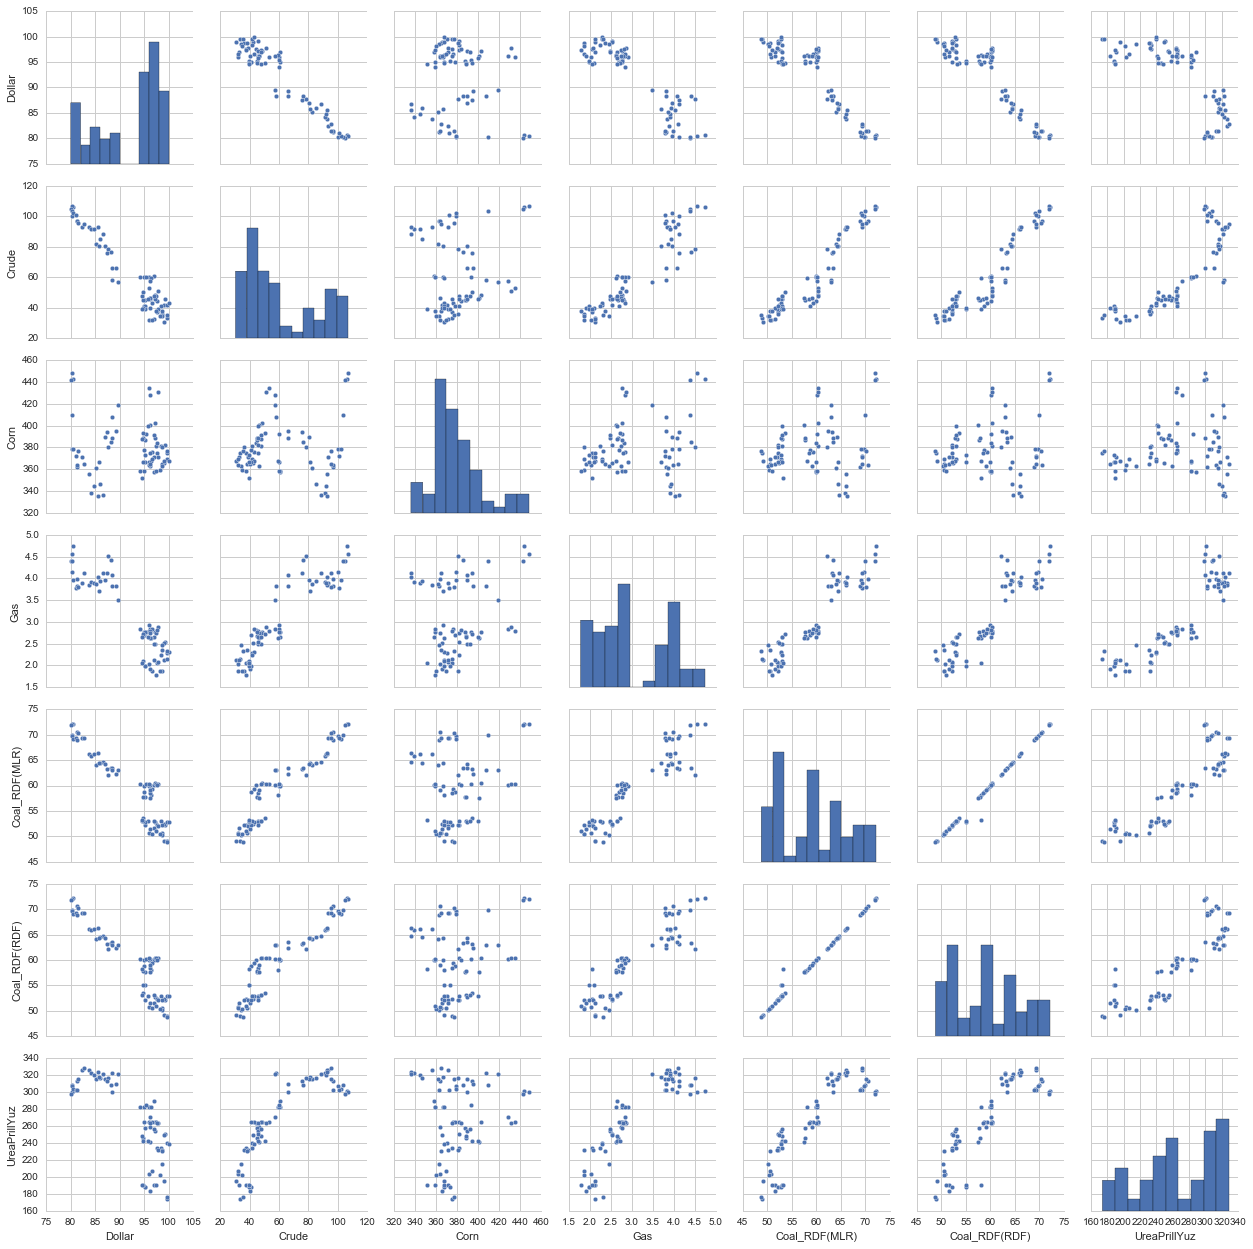

In [8]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(yuznew, size=2.5);
plt.show()

In [9]:
yuz.corr()
#corn doesn't seem important at all when it comes to yuz
#dollar, crude, coal highly correlated

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillYuz
Dollar,1.000000,-0.955532,-0.090188,-0.898432,-0.908641,-0.912017,-0.763036
Crude,-0.955532,1.000000,0.101294,0.922744,0.944055,0.939237,0.837920
Corn,-0.090188,0.101294,1.000000,0.215599,0.217755,0.206096,0.108144
Gas,-0.898432,0.922744,0.215599,1.000000,0.918178,0.907951,0.890753
Coal_RDF(MLR),-0.908641,0.944055,0.217755,0.918178,1.000000,0.995593,0.883195
Coal_RDF(RDF),-0.912017,0.939237,0.206096,0.907951,0.995593,1.000000,0.863697
UreaPrillYuz,-0.763036,0.837920,0.108144,0.890753,0.883195,0.863697,1.000000


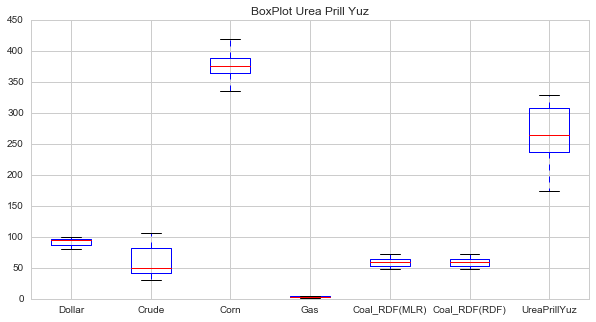

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.show(yuz.plot(kind='box', figsize=(10,5),title=('BoxPlot Urea Prill Yuz')))

In [13]:
#use all variables to see which is important when it comes to MLR
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = yuz[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']]
Y = yuz[['UreaPrillYuz']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaPrillYuz   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     102.3
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           1.62e-30
Time:                        10:31:33   Log-Likelihood:                -312.96
No. Observations:                  75   AIC:                             637.9
Df Residuals:                      69   BIC:                             651.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          -460.0859    115.808     -3.973      0.000      -691.117  -229.055
Dollar            4.5475      1.001      4.545      0.000         2.551     6.544
Crude             0.1276      0.364      0.351      0.727        -0.598     0.853
Corn             -0.3196      0.088     -3.622      0.001        -0.496    -0.144
Gas              41.6631      6.512      6.398      0.000        28.673    54.654
Coal_RDF(MLR)     4.9554      0.945      5.243      0.000         3.070     6.841
==============================================================================
Omnibus:                        0.132   Durbin-Watson:                   0.601
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.003
Skew:                           0.014   Prob(JB):                        0.999
Kurtosis:                       3.000   Cond. No.                     2.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


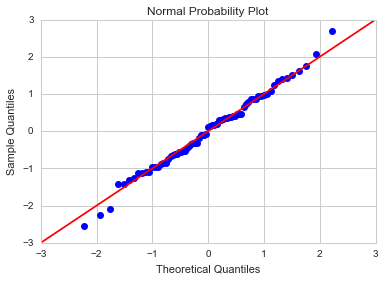

In [36]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)#can clearly see bimodal here
plt.title('Normal Probability Plot')
fig.show()

In [12]:
#coal_RDF(RDF)
X = yuz[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']]
Y = yuz[['UreaPrillYuz']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaPrillYuz   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     90.50
Date:                Wed, 20 Apr 2016   Prob (F-statistic):           6.48e-29
Time:                        09:18:18   Log-Likelihood:                -316.99
No. Observations:                  75   AIC:                             646.0
Df Residuals:                      69   BIC:                             659.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          -475.6274    125.450     -3.791      0.000      -725.894  -225.361
Dollar            4.9196      1.064      4.625      0.000         2.797     7.042
Crude             0.3947      0.370      1.066      0.290        -0.344     1.133
Corn             -0.2860      0.092     -3.099      0.003        -0.470    -0.102
Gas              45.1118      6.755      6.678      0.000        31.635    58.588
Coal_RDF(RDF)     3.9670      0.944      4.201      0.000         2.083     5.851
==============================================================================
Omnibus:                        1.459   Durbin-Watson:                   0.599
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                0.842
Skew:                          -0.188   Prob(JB):                        0.656
Kurtosis:                       3.359   Cond. No.                     2.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#let's just use coal_RDF(MLR) since higher R^2, no corn
X = yuz[['Dollar','Crude','Gas','Coal_RDF(MLR)']]
Y = yuz[['UreaPrillYuz']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaPrillYuz   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     106.3
Date:                Wed, 20 Apr 2016   Prob (F-statistic):           5.74e-29
Time:                        09:18:29   Log-Likelihood:                -319.48
No. Observations:                  75   AIC:                             649.0
Df Residuals:                      70   BIC:                             660.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          -499.1935    124.884     -3.997      0.000      -748.267  -250.120
Dollar            4.2519      1.080      3.936      0.000         2.098     6.406
Crude             0.4553      0.381      1.194      0.237        -0.305     1.216
Gas              36.5088      6.882      5.305      0.000        22.783    50.235
Coal_RDF(MLR)     3.9603      0.980      4.043      0.000         2.007     5.914
==============================================================================
Omnibus:                        6.843   Durbin-Watson:                   0.410
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.142
Skew:                          -0.658   Prob(JB):                       0.0464
Kurtosis:                       3.483   Cond. No.                     7.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#no dollar
X = yuz[['Crude','Corn','Gas','Coal_RDF(MLR)']]
Y = yuz[['UreaPrillYuz']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaPrillYuz   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     95.85
Date:                Wed, 20 Apr 2016   Prob (F-statistic):           1.22e-27
Time:                        09:18:40   Log-Likelihood:                -322.78
No. Observations:                  75   AIC:                             655.6
Df Residuals:                      70   BIC:                             667.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            30.2576     47.612      0.635      0.527       -64.702   125.217
Crude            -0.8797      0.326     -2.698      0.009        -1.530    -0.229
Corn             -0.2869      0.100     -2.882      0.005        -0.485    -0.088
Gas              37.3434      7.290      5.122      0.000        22.803    51.884
Coal_RDF(MLR)     4.7954      1.069      4.486      0.000         2.663     6.927
==============================================================================
Omnibus:                        3.883   Durbin-Watson:                   0.270
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                2.431
Skew:                          -0.234   Prob(JB):                        0.296
Kurtosis:                       2.253   Cond. No.                     8.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#no crude, looks like R^2 the same so don't need crude in MLR model
X = yuz[['Dollar','Corn','Gas','Coal_RDF(MLR)']]
Y = yuz[['UreaPrillYuz']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaPrillYuz   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     129.5
Date:                Wed, 20 Apr 2016   Prob (F-statistic):           1.42e-31
Time:                        09:18:45   Log-Likelihood:                -313.02
No. Observations:                  75   AIC:                             636.0
Df Residuals:                      70   BIC:                             647.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          -441.6370    102.539     -4.307      0.000      -646.145  -237.129
Dollar            4.3334      0.788      5.498      0.000         2.761     5.905
Corn             -0.3273      0.085     -3.854      0.000        -0.497    -0.158
Gas              42.2962      6.217      6.803      0.000        29.896    54.697
Coal_RDF(MLR)     5.1242      0.809      6.338      0.000         3.512     6.737
==============================================================================
Omnibus:                        0.001   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.086
Skew:                          -0.008   Prob(JB):                        0.958
Kurtosis:                       2.835   Cond. No.                     2.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#no coal
X = yuz[['Dollar','Crude','Corn','Gas']]
Y = yuz[['UreaPrillYuz']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaPrillYuz   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     87.82
Date:                Wed, 20 Apr 2016   Prob (F-statistic):           1.58e-26
Time:                        09:19:31   Log-Likelihood:                -325.53
No. Observations:                  75   AIC:                             661.1
Df Residuals:                      70   BIC:                             672.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -286.6927    130.302     -2.200      0.031      -546.571   -26.814
Dollar         4.3521      1.174      3.707      0.000         2.011     6.694
Crude          1.0976      0.367      2.987      0.004         0.365     1.830
Corn          -0.1851      0.099     -1.867      0.066        -0.383     0.013
Gas           51.1312      7.345      6.961      0.000        36.482    65.781
==============================================================================
Omnibus:                        6.627   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.255
Skew:                          -0.422   Prob(JB):                       0.0266
Kurtosis:                       4.269   Cond. No.                     2.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#no coal 
X = yuz[['Dollar','Crude','Corn','Gas']]
Y = yuz[['UreaPrillYuz']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaPrillYuz   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     87.82
Date:                Wed, 20 Apr 2016   Prob (F-statistic):           1.58e-26
Time:                        09:40:55   Log-Likelihood:                -325.53
No. Observations:                  75   AIC:                             661.1
Df Residuals:                      70   BIC:                             672.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -286.6927    130.302     -2.200      0.031      -546.571   -26.814
Dollar         4.3521      1.174      3.707      0.000         2.011     6.694
Crude          1.0976      0.367      2.987      0.004         0.365     1.830
Corn          -0.1851      0.099     -1.867      0.066        -0.383     0.013
Gas           51.1312      7.345      6.961      0.000        36.482    65.781
==============================================================================
Omnibus:                        6.627   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.255
Skew:                          -0.422   Prob(JB):                       0.0266
Kurtosis:                       4.269   Cond. No.                     2.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#RDF with all variables only coal_RDF(MLR)
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = yuznew[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']].values
y = yuznew['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)


In [7]:
#do a few times to see which model parameters are the best overall
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg


In [46]:
rdf_model_yuz = fit_predict_model(X_train,y_train)
print (rdf_model_yuz.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [9]:
#suggested parameters model for yuz
X = yuznew[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']].values
y = yuznew['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#dollar least important so next time get rid of the dollar

MSE train: 26.317, test: 311.618
R^2 train: 0.988, test: 0.819
[ 0.02560488  0.31667451  0.07180572  0.15167939  0.4342355 ]


In [10]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
yuznew['Yuz_Pred_RDF(MLR)'] = urea_predicted3
rdf_error3 = (abs(yuznew['Yuz_Pred_RDF(MLR)'] - yuznew['UreaPrillYuz'])/yuznew['UreaPrillYuz'])*100
yuznew['RDF(MLR)_Error'] = rdf_error3

mlrnocrudemlr = -441.6370 + (yuznew['Dollar']*4.3334) - (yuznew['Corn']*0.3273) + (yuznew['Gas']*42.2962) + (yuznew['Coal_RDF(MLR)']*5.1242)
yuznew['Yuz_PredNoCrude_MLR(MLR)'] = mlrnocrudemlr
mlr_error4 = (abs(yuznew['Yuz_PredNoCrude_MLR(MLR)']-yuznew['UreaPrillYuz'])/yuznew['UreaPrillYuz'])*100
yuznew['MLRNoCrude(MLR)_Error'] = mlr_error4

mlrnocoal = -286.6927 + (yuznew['Dollar']*4.3521) + (yuznew['Crude']*1.0976) - (yuznew['Corn']*0.1851) + (yuznew['Gas']*51.1312)
yuznew['Yuz_Pred_MLRNoCoal'] = mlrnocoal
mlr_error = (abs(yuznew['Yuz_Pred_MLRNoCoal']-yuznew['UreaPrillYuz'])/yuznew['UreaPrillYuz'])*100
yuznew['MLRNoCoal']=mlr_error

print("Average RDF(MLR) error is: %.3f" % (rdf_error3.mean())) 
print("Average MLRNoCrude(MLR) error is: %.3f" % (mlr_error4.mean()))
print("Average MLRNoCoal(MLR) error is: %.3f" % (mlr_error.mean()))

yuznew

Average RDF(MLR) error is: 2.571
Average MLRNoCrude(MLR) error is: 5.147
Average MLRNoCoal(MLR) error is: 5.610


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillYuz,Yuz_Pred_RDF(MLR),RDF(MLR)_Error,Yuz_PredNoCrude_MLR(MLR),MLRNoCrude(MLR)_Error,Yuz_Pred_MLRNoCoal,MLRNoCoal
0,2014-06-13,80.576,106.17,443,4.748,72.15,72.15,301,301.608000,0.201993,333.071,10.6547,341.286,13.384
1,2014-06-20,80.372,106.83,448.25,4.552,72,72,300,302.136000,0.712,321.41,7.1365,330.129,10.043
2,2014-06-27,80.039,105.04,442.25,4.389,71.9,71.9,298,305.984000,2.67919,314.524,5.54483,319.491,7.21184
3,2014-07-04,80.269,103.51,409.5,4.395,69.85,69.85,308,306.688000,0.425974,315.989,2.59367,325.182,5.5785
4,2014-07-11,80.187,100.3,378.25,4.136,69.65,69.65,307,307.264000,0.0859935,313.882,2.24161,313.843,2.22899
5,2014-07-18,80.524,101.95,378.5,3.955,69.1,69.1,304,304.128000,0.0421053,304.786,0.258665,307.82,1.25647
6,2014-07-25,81.029,100.87,371.75,3.787,69.3,69.3,302,303.672000,0.553642,303.103,0.365253,301.491,0.168393
7,2014-08-01,81.302,96.94,362.25,3.822,68.95,68.95,302,308.248000,2.06887,307.082,1.68289,301.914,0.0284604
8,2014-08-08,81.389,96.84,363.5,3.98,70.55,70.55,313,313.992000,0.316933,321.932,2.85359,310.03,0.948793
9,2014-08-15,81.424,95.32,377,3.807,70.25,70.25,315,313.581333,0.45037,308.81,1.96497,297.17,5.66041


In [11]:
#adding RDF using Coal_RDF(RDF)
X = yuznew[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']].values
y = yuznew['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [12]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [14]:
rdf_model_yuz = fit_predict_model(X_train,y_train)
print (rdf_model_yuz.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [15]:
#suggested parameters model for yuz
X = yuznew[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']].values
y = yuznew['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 32.422, test: 277.704
R^2 train: 0.985, test: 0.839
[ 0.02800119  0.43725863  0.05939976  0.20947827  0.26586215]


In [16]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
yuznew['Yuz_Pred_RDF(RDF)'] = urea_predicted3
rdf_error5 = (abs(yuznew['Yuz_Pred_RDF(RDF)'] - yuznew['UreaPrillYuz'])/yuznew['UreaPrillYuz'])*100
yuznew['RDF(RDF)_Error'] = rdf_error5

In [17]:
print("Average RDF(RDF) error is: %.3f" % (rdf_error5.mean()))
yuznew

Average RDF(RDF) error is: 2.600


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillYuz,Yuz_Pred_RDF(MLR),RDF(MLR)_Error,Yuz_PredNoCrude_MLR(MLR),MLRNoCrude(MLR)_Error,Yuz_Pred_MLRNoCoal,MLRNoCoal,Yuz_Pred_RDF(RDF),RDF(RDF)_Error
0,2014-06-13,80.576,106.17,443,4.748,72.15,72.15,301,301.608000,0.201993,333.071,10.6547,341.286,13.384,301.954133,0.316988
1,2014-06-20,80.372,106.83,448.25,4.552,72,72,300,302.136000,0.712,321.41,7.1365,330.129,10.043,302.656667,0.885556
2,2014-06-27,80.039,105.04,442.25,4.389,71.9,71.9,298,305.984000,2.67919,314.524,5.54483,319.491,7.21184,305.976000,2.67651
3,2014-07-04,80.269,103.51,409.5,4.395,69.85,69.85,308,306.688000,0.425974,315.989,2.59367,325.182,5.5785,306.943400,0.343052
4,2014-07-11,80.187,100.3,378.25,4.136,69.65,69.65,307,307.264000,0.0859935,313.882,2.24161,313.843,2.22899,306.958067,0.0136591
5,2014-07-18,80.524,101.95,378.5,3.955,69.1,69.1,304,304.128000,0.0421053,304.786,0.258665,307.82,1.25647,303.777067,0.0733333
6,2014-07-25,81.029,100.87,371.75,3.787,69.3,69.3,302,303.672000,0.553642,303.103,0.365253,301.491,0.168393,303.239067,0.410287
7,2014-08-01,81.302,96.94,362.25,3.822,68.95,68.95,302,308.248000,2.06887,307.082,1.68289,301.914,0.0284604,307.594000,1.85232
8,2014-08-08,81.389,96.84,363.5,3.98,70.55,70.55,313,313.992000,0.316933,321.932,2.85359,310.03,0.948793,312.973600,0.0084345
9,2014-08-15,81.424,95.32,377,3.807,70.25,70.25,315,313.581333,0.45037,308.81,1.96497,297.17,5.66041,314.427200,0.181841


In [23]:
# rdf without dollar since not important feature
X = yuznew[['Crude','Corn','Gas','Coal_RDF(MLR)']].values
y = yuznew['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [19]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [20]:
rdf_model_yuz = fit_predict_model(X_train,y_train)
print (rdf_model_yuz.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [25]:
#suggested parameters model for yuz
X = yuznew[['Crude','Corn','Gas','Coal_RDF(MLR)']].values
y = yuznew['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 29.070, test: 298.378
R^2 train: 0.987, test: 0.827
[ 0.29120463  0.07038261  0.16132588  0.47708688]


In [26]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
yuznew['Yuz_PredNoDollar_RDF(MLR)'] = urea_predicted3
rdf_error5 = (abs(yuznew['Yuz_PredNoDollar_RDF(MLR)'] - yuznew['UreaPrillYuz'])/yuznew['UreaPrillYuz'])*100
yuznew['RDF(MLR)NoDollar_Error'] = rdf_error5
print("Average RDF(MLR)NoDollar error is: %.3f" % (rdf_error5.mean()))
yuznew


Average RDF(MLR)NoDollar error is: 2.601


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillYuz,Yuz_Pred_RDF(MLR),RDF(MLR)_Error,Yuz_PredNoCrude_MLR(MLR),MLRNoCrude(MLR)_Error,Yuz_Pred_MLRNoCoal,MLRNoCoal,Yuz_Pred_RDF(RDF),RDF(RDF)_Error,Yuz_PredNoDollar_RDF(MLR),RDF(MLR)NoDollar_Error
0,2014-06-13,80.576,106.17,443,4.748,72.15,72.15,301,301.608000,0.201993,333.071,10.6547,341.286,13.384,301.954133,0.316988,302.097841,0.364731
1,2014-06-20,80.372,106.83,448.25,4.552,72,72,300,302.136000,0.712,321.41,7.1365,330.129,10.043,302.656667,0.885556,301.952841,0.650947
2,2014-06-27,80.039,105.04,442.25,4.389,71.9,71.9,298,305.984000,2.67919,314.524,5.54483,319.491,7.21184,305.976000,2.67651,303.067508,1.70051
3,2014-07-04,80.269,103.51,409.5,4.395,69.85,69.85,308,306.688000,0.425974,315.989,2.59367,325.182,5.5785,306.943400,0.343052,305.992548,0.65177
4,2014-07-11,80.187,100.3,378.25,4.136,69.65,69.65,307,307.264000,0.0859935,313.882,2.24161,313.843,2.22899,306.958067,0.0136591,305.947503,0.342833
5,2014-07-18,80.524,101.95,378.5,3.955,69.1,69.1,304,304.128000,0.0421053,304.786,0.258665,307.82,1.25647,303.777067,0.0733333,304.577281,0.189895
6,2014-07-25,81.029,100.87,371.75,3.787,69.3,69.3,302,303.672000,0.553642,303.103,0.365253,301.491,0.168393,303.239067,0.410287,304.506352,0.829918
7,2014-08-01,81.302,96.94,362.25,3.822,68.95,68.95,302,308.248000,2.06887,307.082,1.68289,301.914,0.0284604,307.594000,1.85232,308.499566,2.15217
8,2014-08-08,81.389,96.84,363.5,3.98,70.55,70.55,313,313.992000,0.316933,321.932,2.85359,310.03,0.948793,312.973600,0.0084345,314.839753,0.587781
9,2014-08-15,81.424,95.32,377,3.807,70.25,70.25,315,313.581333,0.45037,308.81,1.96497,297.17,5.66041,314.427200,0.181841,314.308817,0.219423


In [27]:
#now use rdf get rid of dollar and corn since neither seem to be important
X = yuznew[['Crude','Gas','Coal_RDF(MLR)']].values
y = yuznew['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [28]:
rdf_model_yuz2 = fit_predict_model(X_train,y_train)
print (rdf_model_yuz2.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [29]:
X = yuznew[['Crude','Gas','Coal_RDF(MLR)']].values
y = yuznew['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 21.485, test: 222.481
R^2 train: 0.990, test: 0.871
[ 0.36389564  0.18824509  0.44785926]


In [30]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
yuznew['Yuz_PredNo$corn_RDF(MLR)'] = urea_predicted3
rdf_error5 = (abs(yuznew['Yuz_PredNo$corn_RDF(MLR)'] - yuznew['UreaPrillYuz'])/yuznew['UreaPrillYuz'])*100
yuznew['RDF(MLR)No$corn_Error'] = rdf_error5
print("Average RDF(MLR)NoDollarCorn error is: %.3f" % (rdf_error5.mean()))
yuznew
#best one yet

Average RDF(MLR)NoDollarCorn error is: 2.277


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillYuz,Yuz_Pred_RDF(MLR),RDF(MLR)_Error,Yuz_PredNoCrude_MLR(MLR),MLRNoCrude(MLR)_Error,Yuz_Pred_MLRNoCoal,MLRNoCoal,Yuz_Pred_RDF(RDF),RDF(RDF)_Error,Yuz_PredNoDollar_RDF(MLR),RDF(MLR)NoDollar_Error,Yuz_PredNo$corn_RDF(MLR),RDF(MLR)No$corn_Error
0,2014-06-13,80.576,106.17,443,4.748,72.15,72.15,301,301.608000,0.201993,333.071,10.6547,341.286,13.384,301.954133,0.316988,302.097841,0.364731,301.928000,0.308306
1,2014-06-20,80.372,106.83,448.25,4.552,72,72,300,302.136000,0.712,321.41,7.1365,330.129,10.043,302.656667,0.885556,301.952841,0.650947,302.136000,0.712
2,2014-06-27,80.039,105.04,442.25,4.389,71.9,71.9,298,305.984000,2.67919,314.524,5.54483,319.491,7.21184,305.976000,2.67651,303.067508,1.70051,303.224000,1.75302
3,2014-07-04,80.269,103.51,409.5,4.395,69.85,69.85,308,306.688000,0.425974,315.989,2.59367,325.182,5.5785,306.943400,0.343052,305.992548,0.65177,306.272000,0.561039
4,2014-07-11,80.187,100.3,378.25,4.136,69.65,69.65,307,307.264000,0.0859935,313.882,2.24161,313.843,2.22899,306.958067,0.0136591,305.947503,0.342833,306.192000,0.263192
5,2014-07-18,80.524,101.95,378.5,3.955,69.1,69.1,304,304.128000,0.0421053,304.786,0.258665,307.82,1.25647,303.777067,0.0733333,304.577281,0.189895,304.064000,0.0210526
6,2014-07-25,81.029,100.87,371.75,3.787,69.3,69.3,302,303.672000,0.553642,303.103,0.365253,301.491,0.168393,303.239067,0.410287,304.506352,0.829918,303.168000,0.386755
7,2014-08-01,81.302,96.94,362.25,3.822,68.95,68.95,302,308.248000,2.06887,307.082,1.68289,301.914,0.0284604,307.594000,1.85232,308.499566,2.15217,308.712000,2.22252
8,2014-08-08,81.389,96.84,363.5,3.98,70.55,70.55,313,313.992000,0.316933,321.932,2.85359,310.03,0.948793,312.973600,0.0084345,314.839753,0.587781,312.272000,0.232588
9,2014-08-15,81.424,95.32,377,3.807,70.25,70.25,315,313.581333,0.45037,308.81,1.96497,297.17,5.66041,314.427200,0.181841,314.308817,0.219423,317.600000,0.825397


In [ ]:
#add predictions part here

In [ ]:
#new predictions models here

In [ ]:
#combine frames of predicted and original

In [ ]:
#save combined file to csv

In [ ]:
#split into monthly chunks from combined

In [ ]:
#graph all and then do daily in future

### Now get rid of coal since so much missing data

In [31]:
yuz1 = original[['Date','Dollar','Crude','Corn','Gas','UreaPrillYuz']]
print(yuz1.shape)
yuz1 = yuz1.dropna()
yuznew1 = np.array(yuz1)
yuznew1 = pd.DataFrame(yuznew1)
yuznew1.columns = ['Date','Dollar','Crude','Corn','Gas','UreaPrillYuz']
yuznew1.head(2)

(685, 6)


,Date,Dollar,Crude,Corn,Gas,UreaPrillYuz
0,6/13/2014,80.576,106.17,443,4.748,301
1,6/16/2014,80.471,106.3,436.75,4.718,301


In [32]:
from datetime import datetime
yuznew1['Date'] = pd.to_datetime(yuznew1['Date'])
date = yuznew1['Date']
yuznew1.dtypes

Date            datetime64[ns]
Dollar                  object
Crude                   object
Corn                    object
Gas                     object
UreaPrillYuz            object
dtype: object

In [43]:
yuznew1.head(2)

,Date,Dollar,Crude,Corn,Gas,UreaPrillYuz
0,2014-06-13,80.576,106.17,443,4.748,301
1,2014-06-16,80.471,106.3,436.75,4.718,301


In [33]:
yuz1.corr()
#dollar,crude, gas highly correlated so have to see what seems to be most important

,Dollar,Crude,Corn,Gas,UreaPrillYuz
Dollar,1.000000,-0.958238,-0.060851,-0.904706,-0.779910
Crude,-0.958238,1.000000,0.063657,0.921165,0.844749
Corn,-0.060851,0.063657,1.000000,0.175023,0.082322
Gas,-0.904706,0.921165,0.175023,1.000000,0.893696
UreaPrillYuz,-0.779910,0.844749,0.082322,0.893696,1.000000


In [36]:
#mlr all
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = yuz1[['Dollar','Crude','Corn','Gas']]
Y= yuz1[['UreaPrillYuz']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaPrillYuz   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     452.8
Date:                Wed, 20 Apr 2016   Prob (F-statistic):          8.36e-139
Time:                        14:37:28   Log-Likelihood:                -1568.7
No. Observations:                 364   AIC:                             3147.
Df Residuals:                     359   BIC:                             3167.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -266.3025     58.158     -4.579      0.000      -380.676  -151.929
Dollar         4.1006      0.519      7.907      0.000         3.081     5.120
Crude          1.1068      0.158      7.007      0.000         0.796     1.417
Corn          -0.1565      0.045     -3.447      0.001        -0.246    -0.067
Gas           48.4898      3.146     15.412      0.000        42.303    54.677
==============================================================================
Omnibus:                       18.173   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.688
Skew:                          -0.324   Prob(JB):                     2.17e-07
Kurtosis:                       4.266   Cond. No.                     2.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#mlr dollar corn
X = yuz1[['Dollar','Corn']]
Y= yuz1[['UreaPrillYuz']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaPrillYuz   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     281.7
Date:                Wed, 20 Apr 2016   Prob (F-statistic):           1.96e-74
Time:                        14:39:04   Log-Likelihood:                -1725.0
No. Observations:                 364   AIC:                             3456.
Df Residuals:                     361   BIC:                             3468.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        725.3515     33.398     21.719      0.000       659.673   791.030
Dollar        -5.2563      0.223    -23.604      0.000        -5.694    -4.818
Corn           0.0703      0.066      1.062      0.289        -0.060     0.201
==============================================================================
Omnibus:                       33.922   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.066
Skew:                          -0.775   Prob(JB):                     3.29e-09
Kurtosis:                       2.587   Cond. No.                     8.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#mlr crude corn
X = yuz1[['Crude','Corn']]
Y= yuz1[['UreaPrillYuz']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaPrillYuz   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     451.5
Date:                Wed, 20 Apr 2016   Prob (F-statistic):           5.74e-99
Time:                        14:39:30   Log-Likelihood:                -1668.1
No. Observations:                 364   AIC:                             3342.
Df Residuals:                     361   BIC:                             3354.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        150.0545     21.533      6.969      0.000       107.709   192.400
Crude          1.5758      0.053     29.909      0.000         1.472     1.679
Corn           0.0576      0.057      1.017      0.310        -0.054     0.169
==============================================================================
Omnibus:                       13.875   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.830
Skew:                          -0.494   Prob(JB):                     0.000602
Kurtosis:                       2.945   Cond. No.                     6.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#mlr gas corn
X = yuz1[['Corn','Gas']]
Y= yuz1[['UreaPrillYuz']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#corn and gas best

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaPrillYuz   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     742.1
Date:                Wed, 20 Apr 2016   Prob (F-statistic):          1.29e-128
Time:                        14:39:57   Log-Likelihood:                -1599.2
No. Observations:                 364   AIC:                             3204.
Df Residuals:                     361   BIC:                             3216.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        178.3481     17.771     10.036      0.000       143.400   213.296
Corn          -0.1536      0.048     -3.233      0.001        -0.247    -0.060
Gas           48.2857      1.259     38.363      0.000        45.810    50.761
==============================================================================
Omnibus:                       20.812   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.073
Skew:                          -0.615   Prob(JB):                     9.77e-06
Kurtosis:                       3.097   Cond. No.                     6.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#rdf all
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = yuznew1[['Dollar','Crude','Corn','Gas']].values
y = yuznew1['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [46]:
rdf_model_yuz3 = fit_predict_model(X_train,y_train)
print (rdf_model_yuz3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [47]:
X = yuznew1[['Dollar','Crude','Corn','Gas']].values
y = yuznew1['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#next get rid of corn and see if any impact

MSE train: 15.388, test: 64.874
R^2 train: 0.992, test: 0.966
[ 0.04227763  0.79168528  0.01961175  0.14642534]


In [48]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
yuznew1['Yuz_Pred_RDFAll'] = urea_predicted3
rdf_error3 = (abs(yuznew1['Yuz_Pred_RDFAll'] - yuznew1['UreaPrillYuz'])/yuznew1['UreaPrillYuz'])*100
yuznew1['RDFAll_Error'] = rdf_error3

mlrall = -266.3025 + (yuznew1['Dollar']*4.1006)+ (yuznew1['Crude']*1.1068)- (yuznew1['Corn']*0.1565) + (yuznew1['Gas']*48.4898) 
yuznew1['Yuz_Pred_MLRAll'] = mlrall
mlr_error4 = (abs(yuznew1['Yuz_Pred_MLRAll']-yuznew1['UreaPrillYuz'])/yuznew1['UreaPrillYuz'])*100
yuznew1['MLRAll_Error'] = mlr_error4

mlrcorngas = 178.3481 - (yuznew1['Corn']*0.1536) + (yuznew1['Gas']*48.2857)
yuznew1['Yuz_Pred_MLR(CornGas)'] = mlrcorngas
mlr_error = (abs(yuznew1['Yuz_Pred_MLR(CornGas)']-yuznew1['UreaPrillYuz'])/yuznew1['UreaPrillYuz'])*100
yuznew1['MLRCornGas']=mlr_error

print("Average RDFAll error is: %.3f" % (rdf_error3.mean())) 
print("Average MLRAll error is: %.3f" % (mlr_error4.mean()))
print("Average MLRCornGas error is: %.3f" % (mlr_error.mean()))

yuznew1

Average RDFAll error is: 1.307
Average MLRAll error is: 5.327
Average MLRCornGas error is: 6.324


,Date,Dollar,Crude,Corn,Gas,UreaPrillYuz,Yuz_Pred_RDFAll,RDAll_Error,Yuz_Pred_MLRAll,MLRAll_Error,Yuz_Pred_MLR(CornGas),MLRCornGas
0,2014-06-13,80.576,106.17,443,4.748,301,300.831857,0.0558614,342.516,13.7928,339.564,12.8119
1,2014-06-16,80.471,106.3,436.75,4.718,301,300.823857,0.0585192,341.753,13.5393,339.075,12.6496
2,2014-06-17,80.629,105.87,434,4.722,301,300.679857,0.10636,342.55,13.8038,339.691,12.8541
3,2014-06-18,80.584,105.59,435.5,4.675,300,300.067857,0.022619,339.541,13.1804,337.191,12.397
4,2014-06-19,80.317,106.05,444.25,4.603,300,298.984000,0.338667,334.095,11.365,332.37,10.7901
5,2014-06-20,80.372,106.83,448.25,4.552,300,299.348190,0.21727,332.085,10.6949,329.293,9.76447
6,2014-06-23,80.272,105.42,439,4.468,300,298.536000,0.488,327.489,9.16288,326.658,8.88607
7,2014-06-24,80.327,105.32,436.75,4.556,299,298.820000,0.0602007,332.223,11.1113,331.253,10.7869
8,2014-06-25,80.225,105.72,435.75,4.569,298,298.316000,0.10604,333.034,11.7564,332.034,11.4209
9,2014-06-26,80.22,105.11,439,4.441,298,298.512000,0.171812,325.623,9.26949,325.354,9.17936


In [49]:
#rdf no corn since least important
X = yuznew1[['Dollar','Crude','Gas']].values
y = yuznew1['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [50]:
rdf_model_yuz4 = fit_predict_model(X_train,y_train)
print (rdf_model_yuz4.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [51]:
X = yuznew1[['Dollar','Crude','Gas']].values
y = yuznew1['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 9.898, test: 65.867
R^2 train: 0.995, test: 0.966
[ 0.04828426  0.80020722  0.15150852]


In [52]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
yuznew1['Yuz_Pred_RDFnoCorn'] = urea_predicted3
rdf_error3 = (abs(yuznew1['Yuz_Pred_RDFnoCorn'] - yuznew1['UreaPrillYuz'])/yuznew1['UreaPrillYuz'])*100
yuznew1['RDFnoCorn_Error'] = rdf_error3
print("Average RDFnoCorn error is: %.3f" % (rdf_error3.mean()))
yuznew1

Average RDFnoCorn error is: 1.142


,Date,Dollar,Crude,Corn,Gas,UreaPrillYuz,Yuz_Pred_RDFAll,RDAll_Error,Yuz_Pred_MLRAll,MLRAll_Error,Yuz_Pred_MLR(CornGas),MLRCornGas,Yuz_Pred_RDFnoCorn,RDFnoCorn_Error
0,2014-06-13,80.576,106.17,443,4.748,301,300.831857,0.0558614,342.516,13.7928,339.564,12.8119,300.830000,0.0564784
1,2014-06-16,80.471,106.3,436.75,4.718,301,300.823857,0.0585192,341.753,13.5393,339.075,12.6496,300.900000,0.0332226
2,2014-06-17,80.629,105.87,434,4.722,301,300.679857,0.10636,342.55,13.8038,339.691,12.8541,300.670000,0.109635
3,2014-06-18,80.584,105.59,435.5,4.675,300,300.067857,0.022619,339.541,13.1804,337.191,12.397,300.090000,0.03
4,2014-06-19,80.317,106.05,444.25,4.603,300,298.984000,0.338667,334.095,11.365,332.37,10.7901,299.160000,0.28
5,2014-06-20,80.372,106.83,448.25,4.552,300,299.348190,0.21727,332.085,10.6949,329.293,9.76447,299.370000,0.21
6,2014-06-23,80.272,105.42,439,4.468,300,298.536000,0.488,327.489,9.16288,326.658,8.88607,298.774000,0.408667
7,2014-06-24,80.327,105.32,436.75,4.556,299,298.820000,0.0602007,332.223,11.1113,331.253,10.7869,298.970000,0.0100334
8,2014-06-25,80.225,105.72,435.75,4.569,298,298.316000,0.10604,333.034,11.7564,332.034,11.4209,298.760000,0.255034
9,2014-06-26,80.22,105.11,439,4.441,298,298.512000,0.171812,325.623,9.26949,325.354,9.17936,298.764000,0.256376


In [53]:
#RDF no corn or dollar
X = yuznew1[['Crude','Gas']].values
y = yuznew1['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [54]:
rdf_model_yuz5 = fit_predict_model(X_train,y_train)
print (rdf_model_yuz5.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [55]:
X = yuznew1[['Crude','Gas']].values
y = yuznew1['UreaPrillYuz'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 17.153, test: 81.146
R^2 train: 0.991, test: 0.958
[ 0.80881537  0.19118463]


In [56]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
yuznew1['Yuz_Pred_RDFcrudeGas'] = urea_predicted3
rdf_error3 = (abs(yuznew1['Yuz_Pred_RDFcrudeGas'] - yuznew1['UreaPrillYuz'])/yuznew1['UreaPrillYuz'])*100
yuznew1['RDFcrudeGas_Error'] = rdf_error3
print("Average RDFcrudeGas error is: %.3f" % (rdf_error3.mean()))
yuznew1

Average RDFcrudeGas error is: 1.506


,Date,Dollar,Crude,Corn,Gas,UreaPrillYuz,Yuz_Pred_RDFAll,RDAll_Error,Yuz_Pred_MLRAll,MLRAll_Error,Yuz_Pred_MLR(CornGas),MLRCornGas,Yuz_Pred_RDFnoCorn,RDFnoCorn_Error,Yuz_Pred_RDFcrudeGas,RDFcrudeGas_Error
0,2014-06-13,80.576,106.17,443,4.748,301,300.831857,0.0558614,342.516,13.7928,339.564,12.8119,300.830000,0.0564784,300.900000,0.0332226
1,2014-06-16,80.471,106.3,436.75,4.718,301,300.823857,0.0585192,341.753,13.5393,339.075,12.6496,300.900000,0.0332226,300.900000,0.0332226
2,2014-06-17,80.629,105.87,434,4.722,301,300.679857,0.10636,342.55,13.8038,339.691,12.8541,300.670000,0.109635,300.653333,0.115172
3,2014-06-18,80.584,105.59,435.5,4.675,300,300.067857,0.022619,339.541,13.1804,337.191,12.397,300.090000,0.03,299.906667,0.0311111
4,2014-06-19,80.317,106.05,444.25,4.603,300,298.984000,0.338667,334.095,11.365,332.37,10.7901,299.160000,0.28,298.886667,0.371111
5,2014-06-20,80.372,106.83,448.25,4.552,300,299.348190,0.21727,332.085,10.6949,329.293,9.76447,299.370000,0.21,299.066667,0.311111
6,2014-06-23,80.272,105.42,439,4.468,300,298.536000,0.488,327.489,9.16288,326.658,8.88607,298.774000,0.408667,298.952549,0.34915
7,2014-06-24,80.327,105.32,436.75,4.556,299,298.820000,0.0602007,332.223,11.1113,331.253,10.7869,298.970000,0.0100334,298.640000,0.120401
8,2014-06-25,80.225,105.72,435.75,4.569,298,298.316000,0.10604,333.034,11.7564,332.034,11.4209,298.760000,0.255034,298.440000,0.147651
9,2014-06-26,80.22,105.11,439,4.441,298,298.512000,0.171812,325.623,9.26949,325.354,9.17936,298.764000,0.256376,298.592549,0.198842


In [ ]:
#add predicted portion

In [ ]:
#make predictions for that part

In [ ]:
#combine predicted and original

In [ ]:
#split into monthly portions

In [ ]:
#graph monthly and themn do for daily

## Urea Gran M East
[Top](#Table-of-Contents)

In [2]:
east = original[['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','UreaGranEast']]
print(east.shape)
east.describe()

(685, 8)


,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranEast
count,685.000000,685.000000,685.000000,685.000000,139.000000,139.000000,685.000000
mean,88.903893,72.101577,407.081387,3.378517,65.881478,65.945891,290.794891
std,7.625408,26.180188,44.250347,0.867233,10.547816,10.480078,45.660815
min,79.093000,28.350000,333.500000,1.767000,48.800000,48.800000,173.000000
25%,80.658000,47.040000,371.500000,2.712000,58.300000,58.319138,264.000000
50%,88.460000,65.960000,391.000000,3.415000,64.100000,64.100000,292.000000
75%,96.310000,98.900000,439.500000,4.136000,74.250000,74.250000,324.000000
max,100.330000,109.520000,521.500000,5.465000,86.500000,86.500000,400.000000


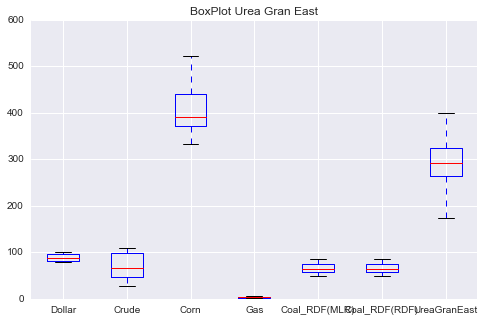

In [4]:
plt.show(east.plot(kind='box', figsize=(8,5),title=('BoxPlot Urea Gran East')))

In [5]:
east.corr()
#everything is pretty much correlated to each other

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranEast
Dollar,1.000000,-0.964485,-0.663102,-0.905450,-0.875990,-0.876971,-0.707525
Crude,-0.964485,1.000000,0.646934,0.899767,0.878869,0.876966,0.700341
Corn,-0.663102,0.646934,1.000000,0.614611,0.692592,0.690578,0.312531
Gas,-0.905450,0.899767,0.614611,1.000000,0.803247,0.799158,0.781863
Coal_RDF(MLR),-0.875990,0.878869,0.692592,0.803247,1.000000,0.998992,0.745408
Coal_RDF(RDF),-0.876971,0.876966,0.690578,0.799158,0.998992,1.000000,0.738823
UreaGranEast,-0.707525,0.700341,0.312531,0.781863,0.745408,0.738823,1.000000


In [7]:
east = east.dropna()
eastnew = np.array(east)
eastnew = pd.DataFrame(eastnew)
eastnew.columns = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','UreaGranEast']
eastnew.head()

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranEast
0,8/2/2013,81.908,106.24,463.75,3.375,77,77,309
1,8/9/2013,81.126,105.16,453.25,3.257,77.7,77.7,293
2,8/16/2013,81.257,107.29,463.5,3.393,78.7,78.7,291
3,8/23/2013,81.361,105.72,470,3.521,78.3,78.3,279
4,8/30/2013,82.087,107.08,482,3.684,78.55,78.55,275


In [8]:
#MLR all using coal_RDF(MLR)
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = east[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']]
Y = east[['UreaGranEast']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaGranEast   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     95.75
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           2.48e-42
Time:                        07:36:20   Log-Likelihood:                -625.01
No. Observations:                 139   AIC:                             1262.
Df Residuals:                     133   BIC:                             1280.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            25.1639    119.103      0.211      0.833      -210.417   260.744
Dollar            1.2079      1.013      1.193      0.235        -0.795     3.211
Crude            -0.5182      0.290     -1.787      0.076        -1.092     0.055
Corn             -0.4643      0.060     -7.702      0.000        -0.584    -0.345
Gas              47.2075      5.223      9.038      0.000        36.876    57.539
Coal_RDF(MLR)     3.4073      0.405      8.409      0.000         2.606     4.209
==============================================================================
Omnibus:                        3.843   Durbin-Watson:                   0.373
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.448
Skew:                           0.379   Prob(JB):                        0.178
Kurtosis:                       3.144   Cond. No.                     2.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


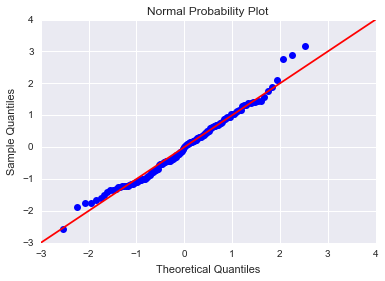

In [9]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)#can clearly see bimodal here
plt.title('Normal Probability Plot')
fig.show()

In [10]:
#MLR all using coal_RDF(RDF)
X = east[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']]
Y = east[['UreaGranEast']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaGranEast   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     92.33
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           1.62e-41
Time:                        07:38:17   Log-Likelihood:                -626.98
No. Observations:                 139   AIC:                             1266.
Df Residuals:                     133   BIC:                             1284.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             2.9146    121.769      0.024      0.981      -237.941   243.770
Dollar            1.4031      1.033      1.359      0.176        -0.639     3.445
Crude            -0.4568      0.293     -1.560      0.121        -1.036     0.122
Corn             -0.4568      0.061     -7.485      0.000        -0.578    -0.336
Gas              48.0297      5.302      9.058      0.000        37.542    58.518
Coal_RDF(RDF)     3.3227      0.412      8.063      0.000         2.508     4.138
==============================================================================
Omnibus:                        3.591   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                3.165
Skew:                           0.360   Prob(JB):                        0.205
Kurtosis:                       3.166   Cond. No.                     2.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#since with all variables the MLR wasn' at least 0.8 for R^2 I won't try any other models just go to all RDF using
#coal_rDF(MLR)
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X=east[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']].values
y=east['UreaGranEast'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [12]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [18]:
rdf_model_east = fit_predict_model(X_train,y_train)
print (rdf_model_east.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [22]:
#Middle east suggested parameters model 
X=east[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']].values
y=east['UreaGranEast'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#gas and coal most important

MSE train: 46.896, test: 218.468
R^2 train: 0.980, test: 0.873
[ 0.05671821  0.07717635  0.04038761  0.16062346  0.66509437]


In [24]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
eastnew['East_Pred_RDF(MLR)'] = urea_predicted3
rdf_error3 = (abs(eastnew['East_Pred_RDF(MLR)'] - eastnew['UreaGranEast'])/eastnew['UreaGranEast'])*100
eastnew['RDF(MLR)_Error'] = rdf_error3

mlrall = 25.1639 + (eastnew['Dollar']*1.2079) -(eastnew['Crude']*0.5182) - (eastnew['Corn']*0.4643) + (eastnew['Gas']*47.2075) + (eastnew['Coal_RDF(MLR)']*3.4073)
eastnew['East_Pred_MLRAll(MLR)'] = mlrall
mlr_error4 = (abs(eastnew['East_Pred_MLRAll(MLR)']-eastnew['UreaGranEast'])/eastnew['UreaGranEast'])*100
eastnew['MLRAll(MLR)_Error'] = mlr_error4

print("Average RDF(MLR) error is: %.3f" % (rdf_error3.mean())) 
print("Average MLRAll(MLR) error is: %.3f" % (mlr_error4.mean()))
eastnew

Average RDF(MLR) error is: 2.643
Average MLRAll(MLR) error is: 6.347


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranEast,East_Pred_RDF(MLR),RDF(MLR)_Error,East_Pred_MLRAll(MLR),MLRAll(MLR)_Error
0,8/2/2013,81.908,106.24,463.75,3.375,77,77,309,303.101453,1.90892,275.415,10.8688
1,8/9/2013,81.126,105.16,453.25,3.257,77.7,77.7,293,293.710767,0.242583,276.72,5.55626
2,8/16/2013,81.257,107.29,463.5,3.393,78.7,78.7,291,291.899343,0.309053,280.843,3.49036
3,8/23/2013,81.361,105.72,470,3.521,78.3,78.3,279,283.329338,1.55173,283.444,1.59281
4,8/30/2013,82.087,107.08,482,3.684,78.55,78.55,275,288.486345,4.90413,286.591,4.21497
5,9/6/2013,82.146,109.52,468.25,3.617,77.1,77.1,276,298.755679,8.24481,283.679,2.78213
6,9/13/2013,81.452,107.54,459,3.755,77.8,77.8,290,292.879425,0.992905,297.061,2.43481
7,9/20/2013,80.431,104.75,463.75,3.763,78.4,78.4,288,289.965077,0.682318,297.49,3.29516
8,9/27/2013,80.287,102.34,466.5,3.769,78.4,78.4,286,288.794363,0.97705,297.571,4.04595
9,10/11/2013,80.362,102.06,446.25,3.929,80.45,80.45,290,305.771776,5.43854,321.747,10.9474


In [25]:
#now RDF model all using coal_RDF(RDF)
X=east[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']].values
y=east['UreaGranEast'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [28]:
rdf_model_east2 = fit_predict_model(X_train,y_train)
print (rdf_model_east2.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [29]:
X=east[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']].values
y=east['UreaGranEast'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#crude, gas and coal most important so I will use them next in an RDF model

MSE train: 51.014, test: 204.248
R^2 train: 0.978, test: 0.881
[ 0.05290947  0.11552814  0.03834581  0.23835642  0.55486015]


In [30]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
eastnew['East_Pred_RDF(RDF)'] = urea_predicted3
rdf_error4 = (abs(eastnew['East_Pred_RDF(RDF)'] - eastnew['UreaGranEast'])/eastnew['UreaGranEast'])*100
eastnew['RDF(MLR)_Error'] = rdf_error4
print("Average RDF(RDF) error is: %.3f" % (rdf_error4.mean()))
eastnew

Average RDF(RDF) error is: 2.638


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranEast,East_Pred_RDF(MLR),RDF(MLR)_Error,East_Pred_MLRAll(MLR),MLRAll(MLR)_Error,East_Pred_RDF(RDF)
0,8/2/2013,81.908,106.24,463.75,3.375,77,77,309,303.101453,1.93568,275.415,10.8688,303.018752
1,8/9/2013,81.126,105.16,453.25,3.257,77.7,77.7,293,293.710767,0.453403,276.72,5.55626,294.328471
2,8/16/2013,81.257,107.29,463.5,3.393,78.7,78.7,291,291.899343,0.508292,280.843,3.49036,292.479130
3,8/23/2013,81.361,105.72,470,3.521,78.3,78.3,279,283.329338,1.75709,283.444,1.59281,283.902278
4,8/30/2013,82.087,107.08,482,3.684,78.55,78.55,275,288.486345,5.25521,286.591,4.21497,289.451833
5,9/6/2013,82.146,109.52,468.25,3.617,77.1,77.1,276,298.755679,7.99376,283.679,2.78213,298.062789
6,9/13/2013,81.452,107.54,459,3.755,77.8,77.8,290,292.879425,0.915447,297.061,2.43481,292.654796
7,9/20/2013,80.431,104.75,463.75,3.763,78.4,78.4,288,289.965077,0.594222,297.49,3.29516,289.711360
8,9/27/2013,80.287,102.34,466.5,3.769,78.4,78.4,286,288.794363,0.793754,297.571,4.04595,288.270138
9,10/11/2013,80.362,102.06,446.25,3.929,80.45,80.45,290,305.771776,5.54695,321.747,10.9474,306.086167


In [31]:
#top 3 features so crude, gas, coal_RDF(RDF)
X=east[['Crude','Gas','Coal_RDF(RDF)']].values
y=east['UreaGranEast'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [35]:
rdf_model_east3 = fit_predict_model(X_train,y_train)
print (rdf_model_east3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [36]:
X=east[['Crude','Gas','Coal_RDF(RDF)']].values
y=east['UreaGranEast'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 49.136, test: 259.952
R^2 train: 0.979, test: 0.849
[ 0.11625104  0.2616506   0.62209836]


In [37]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
eastnew['East_Pred_RDF(RDF)Top3'] = urea_predicted3
rdf_error4 = (abs(eastnew['East_Pred_RDF(RDF)Top3'] - eastnew['UreaGranEast'])/eastnew['UreaGranEast'])*100
eastnew['RDF(MLR)_Error'] = rdf_error4
print("Average RDF(RDF) error is: %.3f" % (rdf_error4.mean()))
eastnew

Average RDF(RDF) error is: 2.666


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranEast,East_Pred_RDF(MLR),RDF(MLR)_Error,East_Pred_MLRAll(MLR),MLRAll(MLR)_Error,East_Pred_RDF(RDF),East_Pred_RDF(RDF)Top3
0,8/2/2013,81.908,106.24,463.75,3.375,77,77,309,303.101453,2.33134,275.415,10.8688,303.018752,301.796152
1,8/9/2013,81.126,105.16,453.25,3.257,77.7,77.7,293,293.710767,0.387957,276.72,5.55626,294.328471,294.136715
2,8/16/2013,81.257,107.29,463.5,3.393,78.7,78.7,291,291.899343,0.166964,280.843,3.49036,292.479130,290.514133
3,8/23/2013,81.361,105.72,470,3.521,78.3,78.3,279,283.329338,2.32832,283.444,1.59281,283.902278,285.496000
4,8/30/2013,82.087,107.08,482,3.684,78.55,78.55,275,288.486345,4.98415,286.591,4.21497,289.451833,288.706400
5,9/6/2013,82.146,109.52,468.25,3.617,77.1,77.1,276,298.755679,8.21416,283.679,2.78213,298.062789,298.671086
6,9/13/2013,81.452,107.54,459,3.755,77.8,77.8,290,292.879425,0.00570115,297.061,2.43481,292.654796,289.983467
7,9/20/2013,80.431,104.75,463.75,3.763,78.4,78.4,288,289.965077,0.031915,297.49,3.29516,289.711360,288.091915
8,9/27/2013,80.287,102.34,466.5,3.769,78.4,78.4,286,288.794363,0.819085,297.571,4.04595,288.270138,288.342582
9,10/11/2013,80.362,102.06,446.25,3.929,80.45,80.45,290,305.771776,1.97646,321.747,10.9474,306.086167,295.731733


In [ ]:
#add predictions part

In [ ]:
#new predictions made using original models

In [ ]:
#combine frames of predicted and original

In [ ]:
#save combined file to csv

In [ ]:
#split into monthly chinks

In [ ]:
#graph all models and then do as daily too

### Now get rid of coal since so much missing data

In [38]:
east1 = original[['Date','Dollar','Crude','Corn','Gas','UreaGranEast']]
print(east1.shape)
east1 = east1.dropna()
eastnew1 = np.array(east1)
eastnew1 = pd.DataFrame(eastnew1)
eastnew1.columns = ['Date','Dollar','Crude','Corn','Gas','UreaGranEast']
eastnew1.head(2)

(685, 6)


,Date,Dollar,Crude,Corn,Gas,UreaGranEast
0,8/1/2013,82.336,106.93,467,3.415,308
1,8/2/2013,81.908,106.24,463.75,3.375,309


In [39]:
from datetime import datetime
eastnew1['Date'] = pd.to_datetime(eastnew1['Date'])
date = eastnew1['Date']
eastnew1.dtypes

Date            datetime64[ns]
Dollar                  object
Crude                   object
Corn                    object
Gas                     object
UreaGranEast            object
dtype: object

In [40]:
east1.corr() #gas most correlated

,Dollar,Crude,Corn,Gas,UreaGranEast
Dollar,1.000000,-0.964485,-0.663102,-0.905450,-0.707525
Crude,-0.964485,1.000000,0.646934,0.899767,0.700341
Corn,-0.663102,0.646934,1.000000,0.614611,0.312531
Gas,-0.905450,0.899767,0.614611,1.000000,0.781863
UreaGranEast,-0.707525,0.700341,0.312531,0.781863,1.000000


In [41]:
#mlr all
X = east1[['Dollar','Crude','Corn','Gas']]
Y= east1[['UreaGranEast']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#bad MLR

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaGranEast   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     332.5
Date:                Thu, 21 Apr 2016   Prob (F-statistic):          2.14e-158
Time:                        08:16:05   Log-Likelihood:                -3217.8
No. Observations:                 685   AIC:                             6446.
Df Residuals:                     680   BIC:                             6468.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        376.3868     63.039      5.971      0.000       252.612   500.161
Dollar        -1.1411      0.543     -2.101      0.036        -2.208    -0.075
Crude         -0.0324      0.152     -0.213      0.831        -0.330     0.265
Corn          -0.3094      0.031    -10.048      0.000        -0.370    -0.249
Gas           42.6639      2.849     14.973      0.000        37.069    48.259
==============================================================================
Omnibus:                        0.181   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.914   Jarque-Bera (JB):                0.277
Skew:                          -0.006   Prob(JB):                        0.871
Kurtosis:                       2.902   Cond. No.                     2.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#get rid of crude did nothing, let's get rid of corn too since doesn't look important
X = east1[['Dollar','Corn','Gas']]
Y= east1[['UreaGranEast']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaGranEast   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     443.9
Date:                Thu, 21 Apr 2016   Prob (F-statistic):          9.57e-160
Time:                        08:17:01   Log-Likelihood:                -3217.9
No. Observations:                 685   AIC:                             6444.
Df Residuals:                     681   BIC:                             6462.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        366.4492     42.482      8.626      0.000       283.037   449.861
Dollar        -1.0493      0.332     -3.163      0.002        -1.701    -0.398
Corn          -0.3096      0.031    -10.065      0.000        -0.370    -0.249
Gas           42.5210      2.768     15.363      0.000        37.087    47.955
==============================================================================
Omnibus:                        0.142   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.233
Skew:                           0.008   Prob(JB):                        0.890
Kurtosis:                       2.911   Cond. No.                     1.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
X = east1[['Dollar','Gas']]
Y= east1[['UreaGranEast']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UreaGranEast   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     536.3
Date:                Thu, 21 Apr 2016   Prob (F-statistic):          1.13e-140
Time:                        08:17:39   Log-Likelihood:                -3265.4
No. Observations:                 685   AIC:                             6537.
Df Residuals:                     682   BIC:                             6550.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        150.1233     39.247      3.825      0.000        73.065   227.182
Dollar         0.0137      0.337      0.041      0.967        -0.648     0.675
Gas           41.2754      2.961     13.938      0.000        35.461    47.090
==============================================================================
Omnibus:                        8.119   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.247
Skew:                          -0.254   Prob(JB):                       0.0162
Kurtosis:                       2.825   Cond. No.                     3.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#RDF all variables
X = eastnew1[['Dollar','Crude','Corn','Gas']].values
y = eastnew1['UreaGranEast'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [46]:
rdf_model_east4 = fit_predict_model(X_train,y_train)
print (rdf_model_east4.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [47]:
X = eastnew1[['Dollar','Crude','Corn','Gas']].values
y = eastnew1['UreaGranEast'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#corn not important so in next RDF I will get rid of it

MSE train: 22.571, test: 147.875
R^2 train: 0.989, test: 0.930
[ 0.33442923  0.10284802  0.09280439  0.46991836]


In [48]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
eastnew1['East_Pred_RDFAll'] = urea_predicted3
rdf_error3 = (abs(eastnew1['East_Pred_RDFAll'] - eastnew1['UreaGranEast'])/eastnew1['UreaGranEast'])*100
eastnew1['RDFAll_Error'] = rdf_error3

mlrnocrude = 366.4492 - (eastnew1['Dollar']*1.0493) - (eastnew1['Corn']*0.3096) + (eastnew1['Gas']*42.5210) 
eastnew1['East_Pred_MLRnoCrude'] = mlrnocrude
mlr_error4 = (abs(eastnew1['East_Pred_MLRnoCrude']-eastnew1['UreaGranEast'])/eastnew1['UreaGranEast'])*100
eastnew1['MLRnoCrude_Error'] = mlr_error4

print("Average RDFAll error is: %.3f" % (rdf_error3.mean())) 
print("Average MLRnoCrude error is: %.3f" % (mlr_error4.mean()))
eastnew1

Average RDFAll error is: 1.643
Average MLRnoCrude error is: 7.586


,Date,Dollar,Crude,Corn,Gas,UreaGranEast,East_Pred_RDFAll,RDFAll_Error,East_Pred_MLRnoCrude,MLRnoCrude_Error
0,2013-08-01,82.336,106.93,467,3.415,308,280.633111,8.88535,280.68,8.87011
1,2013-08-02,81.908,106.24,463.75,3.375,309,300.402506,2.78236,280.435,9.24449
2,2013-08-05,81.875,105.9,460.5,3.346,305,301.316284,1.20778,280.242,8.1173
3,2013-08-06,81.603,104.76,459.25,3.343,297,291.321654,1.9119,280.787,5.4589
4,2013-08-07,81.287,103.91,458.25,3.272,295,293.675617,0.448943,278.409,5.62398
5,2013-08-08,80.977,102.87,459.75,3.321,294,293.066977,0.317355,280.354,4.64161
6,2013-08-09,81.126,105.16,453.25,3.257,293,293.728860,0.248758,279.488,4.61147
7,2013-08-12,81.333,105.52,464,3.335,289,290.332620,0.461114,279.26,3.37037
8,2013-08-13,81.768,106.4,447.25,3.312,286,296.934797,3.82336,283.011,1.04511
9,2013-08-14,81.711,106.56,455.25,3.365,288,290.590782,0.899577,282.848,1.78902


In [49]:
#RDF no corn since least important feature
X = eastnew1[['Dollar','Crude','Gas']].values
y = eastnew1['UreaGranEast'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [52]:
rdf_model_east5 = fit_predict_model(X_train,y_train)
print (rdf_model_east5.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [53]:
X = eastnew1[['Dollar','Crude','Gas']].values
y = eastnew1['UreaGranEast'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 34.580, test: 217.189
R^2 train: 0.983, test: 0.897
[ 0.40307802  0.15244795  0.44447402]


In [54]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
eastnew1['East_Pred_RDFnoCorn'] = urea_predicted3
rdf_error3 = (abs(eastnew1['East_Pred_RDFnoCorn'] - eastnew1['UreaGranEast'])/eastnew1['UreaGranEast'])*100
eastnew1['RDFnoCorn_Error'] = rdf_error3
print("Average RDF no corn error is: %.3f" % (rdf_error3.mean()))
eastnew1

Average RDF no corn error is: 1.977


,Date,Dollar,Crude,Corn,Gas,UreaGranEast,East_Pred_RDFAll,RDFAll_Error,East_Pred_MLRnoCrude,MLRnoCrude_Error,East_Pred_RDFnoCorn,RDFnoCorn_Error
0,2013-08-01,82.336,106.93,467,3.415,308,280.633111,8.88535,280.68,8.87011,281.447395,8.62098
1,2013-08-02,81.908,106.24,463.75,3.375,309,300.402506,2.78236,280.435,9.24449,303.576728,1.7551
2,2013-08-05,81.875,105.9,460.5,3.346,305,301.316284,1.20778,280.242,8.1173,302.261728,0.897794
3,2013-08-06,81.603,104.76,459.25,3.343,297,291.321654,1.9119,280.787,5.4589,289.622464,2.48402
4,2013-08-07,81.287,103.91,458.25,3.272,295,293.675617,0.448943,278.409,5.62398,293.609415,0.471385
5,2013-08-08,80.977,102.87,459.75,3.321,294,293.066977,0.317355,280.354,4.64161,292.770682,0.418135
6,2013-08-09,81.126,105.16,453.25,3.257,293,293.728860,0.248758,279.488,4.61147,292.875360,0.0425393
7,2013-08-12,81.333,105.52,464,3.335,289,290.332620,0.461114,279.26,3.37037,290.643590,0.568716
8,2013-08-13,81.768,106.4,447.25,3.312,286,296.934797,3.82336,283.011,1.04511,288.567126,0.897596
9,2013-08-14,81.711,106.56,455.25,3.365,288,290.590782,0.899577,282.848,1.78902,289.521144,0.528175


In [ ]:
#add predictions part

In [ ]:
#new predictions made for future

In [ ]:
#combine frames of predicted and original

In [ ]:
#save combined file to csv

In [ ]:
#split into monthly chunks

In [ ]:
#graph all models and then put in daily form

## Urea Prill China
[Top](#Table-of-Contents)

In [55]:
china = original[['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','UreaPrillChina']]
print(china.shape)
china.describe()

(685, 8)


,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillChina
count,685.000000,685.000000,685.000000,685.000000,139.000000,139.000000,364.000000
mean,88.903893,72.101577,407.081387,3.378517,65.881478,65.945891,256.939560
std,7.625408,26.180188,44.250347,0.867233,10.547816,10.480078,32.754983
min,79.093000,28.350000,333.500000,1.767000,48.800000,48.800000,170.000000
25%,80.658000,47.040000,371.500000,2.712000,58.300000,58.319138,244.750000
50%,88.460000,65.960000,391.000000,3.415000,64.100000,64.100000,264.500000
75%,96.310000,98.900000,439.500000,4.136000,74.250000,74.250000,287.000000
max,100.330000,109.520000,521.500000,5.465000,86.500000,86.500000,293.000000


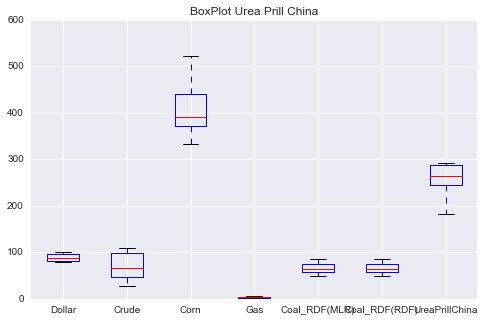

In [57]:
plt.show(china.plot(kind='box', figsize=(8,5),title=('BoxPlot Urea Prill China')))

In [58]:
china.corr()
#gas,coal,crude correlated

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillChina
Dollar,1.000000,-0.964485,-0.663102,-0.905450,-0.875990,-0.876971,-0.479163
Crude,-0.964485,1.000000,0.646934,0.899767,0.878869,0.876966,0.598406
Corn,-0.663102,0.646934,1.000000,0.614611,0.692592,0.690578,0.079334
Gas,-0.905450,0.899767,0.614611,1.000000,0.803247,0.799158,0.676782
Coal_RDF(MLR),-0.875990,0.878869,0.692592,0.803247,1.000000,0.998992,0.693413
Coal_RDF(RDF),-0.876971,0.876966,0.690578,0.799158,0.998992,1.000000,0.675002
UreaPrillChina,-0.479163,0.598406,0.079334,0.676782,0.693413,0.675002,1.000000


In [59]:
china = china.dropna()
chinanew = np.array(china)
chinanew = pd.DataFrame(chinanew)
chinanew.columns = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','UreaPrillChina']
chinanew.head(2)

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillChina
0,6/13/2014,80.576,106.17,443,4.748,72.15,72.15,250
1,6/20/2014,80.372,106.83,448.25,4.552,72,72,249


In [60]:
#mlr all using coal_RDF(MLR)
X = china[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']]
Y = china[['UreaPrillChina']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UreaPrillChina   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     44.38
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           2.99e-20
Time:                        08:44:03   Log-Likelihood:                -314.52
No. Observations:                  75   AIC:                             641.0
Df Residuals:                      69   BIC:                             654.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          -757.2472    118.248     -6.404      0.000      -993.145  -521.349
Dollar            7.3512      1.022      7.195      0.000         5.313     9.389
Crude             0.1057      0.371      0.285      0.777        -0.635     0.846
Corn             -0.3389      0.090     -3.761      0.000        -0.519    -0.159
Gas              30.8254      6.649      4.636      0.000        17.561    44.089
Coal_RDF(MLR)     6.1403      0.965      6.362      0.000         4.215     8.066
==============================================================================
Omnibus:                        2.734   Durbin-Watson:                   0.543
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.238
Skew:                          -0.420   Prob(JB):                        0.327
Kurtosis:                       3.104   Cond. No.                     2.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
#MLR using coal_RDF(RDF)
X = china[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']]
Y = china[['UreaPrillChina']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UreaPrillChina   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     40.67
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           2.81e-19
Time:                        08:44:53   Log-Likelihood:                -316.99
No. Observations:                  75   AIC:                             646.0
Df Residuals:                      69   BIC:                             659.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          -802.6816    125.454     -6.398      0.000     -1052.955  -552.408
Dollar            7.8909      1.064      7.418      0.000         5.769    10.013
Crude             0.3393      0.370      0.917      0.363        -0.399     1.078
Corn             -0.3113      0.092     -3.373      0.001        -0.495    -0.127
Gas              34.2647      6.756      5.072      0.000        20.788    47.742
Coal_RDF(RDF)     5.4652      0.944      5.788      0.000         3.582     7.349
==============================================================================
Omnibus:                        3.282   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                2.799
Skew:                          -0.471   Prob(JB):                        0.247
Kurtosis:                       3.086   Cond. No.                     2.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
#mlr use gas, coal, crude
X = china[['Crude','Gas','Coal_RDF(MLR)']]
Y = china[['UreaPrillChina']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#bad idea, no mlr models that good

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UreaPrillChina   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     28.93
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           2.49e-12
Time:                        08:45:33   Log-Likelihood:                -338.54
No. Observations:                  75   AIC:                             685.1
Df Residuals:                      71   BIC:                             694.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           -28.5353     51.567     -0.553      0.582      -131.357    74.286
Crude            -1.1684      0.370     -3.159      0.002        -1.906    -0.431
Gas              19.4520      8.733      2.227      0.029         2.039    36.865
Coal_RDF(MLR)     4.9945      1.254      3.984      0.000         2.495     7.494
==============================================================================
Omnibus:                        3.042   Durbin-Watson:                   0.168
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.829
Skew:                          -0.400   Prob(JB):                        0.243
Kurtosis:                       2.486   Cond. No.                     1.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
#RDF all model using coal_RDF(MLR)
X=chinanew[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']].values
y=chinanew['UreaPrillChina'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(52, 5)

In [65]:
rdf_model_china = fit_predict_model(X_train,y_train)
print (rdf_model_china.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [66]:
#china suggested parameters model
X=chinanew[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']].values
y=chinanew['UreaPrillChina'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#crude,gas,coal are most important

MSE train: 28.062, test: 154.335
R^2 train: 0.977, test: 0.811
[ 0.03326418  0.58155237  0.04023054  0.15447076  0.19048214]


In [67]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
chinanew['China_Pred_RDF(MLR)'] = urea_predicted3
rdf_error3 = (abs(chinanew['China_Pred_RDF(MLR)'] - chinanew['UreaPrillChina'])/chinanew['UreaPrillChina'])*100
chinanew['RDF(MLR)_Error'] = rdf_error3

mlrall = -757.2472 + (chinanew['Dollar']*7.3512) + (chinanew['Crude']*0.1057) - (chinanew['Corn']*0.3389) + (chinanew['Gas']*30.8254) + (chinanew['Coal_RDF(MLR)']*6.1403)
chinanew['China_Pred_MLRAll(MLR)'] = mlrall
mlr_error4 = (abs(chinanew['China_Pred_MLRAll(MLR)']-chinanew['UreaPrillChina'])/chinanew['UreaPrillChina'])*100
chinanew['MLRAll(MLR)_Error'] = mlr_error4

print("Average RDF(MLR) error is: %.3f" % (rdf_error3.mean())) 
print("Average MLRAll(MLR) error is: %.3f" % (mlr_error4.mean()))
chinanew

Average RDF(MLR) error is: 2.028
Average MLRAll(MLR) error is: 5.346


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillChina,China_Pred_RDF(MLR),RDF(MLR)_Error,China_Pred_MLRAll(MLR),MLRAll(MLR)_Error
0,6/13/2014,80.576,106.17,443,4.748,72.15,72.15,250,251.750000,0.7,285.554,14.2217
1,6/20/2014,80.372,106.83,448.25,4.552,72,72,249,251.650000,1.06426,275.382,10.5953
2,6/27/2014,80.039,105.04,442.25,4.389,71.9,71.9,252,253.070000,0.424603,269.14,6.80157
3,7/4/2014,80.269,103.51,409.5,4.395,69.85,69.85,258,257.480000,0.20155,269.365,4.40516
4,7/11/2014,80.187,100.3,378.25,4.136,69.65,69.65,258,258.840000,0.325581,269.802,4.57442
5,7/18/2014,80.524,101.95,378.5,3.955,69.1,69.1,259,259.240000,0.0926641,263.412,1.70366
6,7/25/2014,81.029,100.87,371.75,3.787,69.3,69.3,259,261.309206,0.891585,265.348,2.45083
7,8/1/2014,81.302,96.94,362.25,3.822,68.95,68.95,262,267.329206,2.03405,269.088,2.70552
8,8/8/2014,81.389,96.84,363.5,3.98,70.55,70.55,272,272.234286,0.0861345,283.989,4.40761
9,8/15/2014,81.424,95.32,377,3.807,70.25,70.25,287,283.664853,1.16207,272.335,5.10965


In [68]:
#RDF all using Coal_RDF(RDF)
X=chinanew[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']].values
y=chinanew['UreaPrillChina'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [71]:
rdf_model_china2 = fit_predict_model(X_train,y_train)
print (rdf_model_china2.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [73]:
X=chinanew[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']].values
y=chinanew['UreaPrillChina'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#crude, gas, coal most important so I will make that model next

MSE train: 29.254, test: 159.129
R^2 train: 0.976, test: 0.805
[ 0.04167134  0.57573165  0.05128541  0.20417613  0.12713546]


In [74]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
chinanew['China_Pred_RDF(RDF)'] = urea_predicted3
rdf_error3 = (abs(chinanew['China_Pred_RDF(RDF)'] - chinanew['UreaPrillChina'])/chinanew['UreaPrillChina'])*100
chinanew['RDF(RDF)_Error'] = rdf_error3
print("Average RDF(RDF) error is: %.3f" % (rdf_error3.mean()))
chinanew

Average RDF(RDF) error is: 2.084


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillChina,China_Pred_RDF(MLR),RDF(MLR)_Error,China_Pred_MLRAll(MLR),MLRAll(MLR)_Error,China_Pred_RDF(RDF),RDF(RDF)_Error
0,6/13/2014,80.576,106.17,443,4.748,72.15,72.15,250,251.750000,0.7,285.554,14.2217,251.314286,0.525714
1,6/20/2014,80.372,106.83,448.25,4.552,72,72,249,251.650000,1.06426,275.382,10.5953,251.262857,0.908778
2,6/27/2014,80.039,105.04,442.25,4.389,71.9,71.9,252,253.070000,0.424603,269.14,6.80157,252.462857,0.183673
3,7/4/2014,80.269,103.51,409.5,4.395,69.85,69.85,258,257.480000,0.20155,269.365,4.40516,257.885714,0.0442968
4,7/11/2014,80.187,100.3,378.25,4.136,69.65,69.65,258,258.840000,0.325581,269.802,4.57442,258.582857,0.225914
5,7/18/2014,80.524,101.95,378.5,3.955,69.1,69.1,259,259.240000,0.0926641,263.412,1.70366,259.251429,0.0970767
6,7/25/2014,81.029,100.87,371.75,3.787,69.3,69.3,259,261.309206,0.891585,265.348,2.45083,261.349633,0.907194
7,8/1/2014,81.302,96.94,362.25,3.822,68.95,68.95,262,267.329206,2.03405,269.088,2.70552,269.471139,2.85158
8,8/8/2014,81.389,96.84,363.5,3.98,70.55,70.55,272,272.234286,0.0861345,283.989,4.40761,274.179576,0.801315
9,8/15/2014,81.424,95.32,377,3.807,70.25,70.25,287,283.664853,1.16207,272.335,5.10965,281.788834,1.81574


In [75]:
#RDF using crude, gas, coal
X=chinanew[['Crude','Gas','Coal_RDF(RDF)']].values
y=chinanew['UreaPrillChina'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [80]:
rdf_model_china3 = fit_predict_model(X_train,y_train)
print (rdf_model_china3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [81]:
X=chinanew[['Crude','Gas','Coal_RDF(RDF)']].values
y=chinanew['UreaPrillChina'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 21.954, test: 155.004
R^2 train: 0.982, test: 0.810
[ 0.6665833   0.18969376  0.14372294]


In [82]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
chinanew['China_Pred_RDF(RDF)Top3'] = urea_predicted3
rdf_error3 = (abs(chinanew['China_Pred_RDF(RDF)Top3'] - chinanew['UreaPrillChina'])/chinanew['UreaPrillChina'])*100
chinanew['RDF(RDF)Top3_Error'] = rdf_error3
print("Average RDF(RDF) Top3 error is: %.3f" % (rdf_error3.mean()))
chinanew

Average RDF(RDF) Top3 error is: 1.973


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaPrillChina,China_Pred_RDF(MLR),RDF(MLR)_Error,China_Pred_MLRAll(MLR),MLRAll(MLR)_Error,China_Pred_RDF(RDF),RDF(RDF)_Error,China_Pred_RDF(RDF)Top3,RDF(RDF)Top3_Error
0,6/13/2014,80.576,106.17,443,4.748,72.15,72.15,250,251.750000,0.7,285.554,14.2217,251.314286,0.525714,251.046667,0.418667
1,6/20/2014,80.372,106.83,448.25,4.552,72,72,249,251.650000,1.06426,275.382,10.5953,251.262857,0.908778,251.013333,0.808568
2,6/27/2014,80.039,105.04,442.25,4.389,71.9,71.9,252,253.070000,0.424603,269.14,6.80157,252.462857,0.183673,252.673333,0.267196
3,7/4/2014,80.269,103.51,409.5,4.395,69.85,69.85,258,257.480000,0.20155,269.365,4.40516,257.885714,0.0442968,257.546667,0.175711
4,7/11/2014,80.187,100.3,378.25,4.136,69.65,69.65,258,258.840000,0.325581,269.802,4.57442,258.582857,0.225914,258.253333,0.0981912
5,7/18/2014,80.524,101.95,378.5,3.955,69.1,69.1,259,259.240000,0.0926641,263.412,1.70366,259.251429,0.0970767,259.800000,0.30888
6,7/25/2014,81.029,100.87,371.75,3.787,69.3,69.3,259,261.309206,0.891585,265.348,2.45083,261.349633,0.907194,259.453333,0.175032
7,8/1/2014,81.302,96.94,362.25,3.822,68.95,68.95,262,267.329206,2.03405,269.088,2.70552,269.471139,2.85158,267.012870,1.91331
8,8/8/2014,81.389,96.84,363.5,3.98,70.55,70.55,272,272.234286,0.0861345,283.989,4.40761,274.179576,0.801315,271.198333,0.29473
9,8/15/2014,81.424,95.32,377,3.807,70.25,70.25,287,283.664853,1.16207,272.335,5.10965,281.788834,1.81574,284.080728,1.01717


In [ ]:
#add predictions part

In [ ]:
#new predictions made

In [ ]:
# combine frames of original and predicted 

In [ ]:
#save combined files to csv

In [ ]:
#split into monthly chunks

In [ ]:
#graph all models and then put in daily form

### Since missing lots of data with coal I will not use coal

In [84]:
china1 = original[['Date','Dollar','Crude','Corn','Gas','UreaPrillChina']]
print(china1.shape)
china1 = china1.dropna()
chinanew1 = np.array(china1)
chinanew1 = pd.DataFrame(chinanew1)
chinanew1.columns = ['Date','Dollar','Crude','Corn','Gas','UreaPrillChina']
chinanew1.head(2)

(685, 6)


,Date,Dollar,Crude,Corn,Gas,UreaPrillChina
0,6/13/2014,80.576,106.17,443,4.748,250
1,6/16/2014,80.471,106.3,436.75,4.718,250


In [85]:
from datetime import datetime
chinanew1['Date'] = pd.to_datetime(chinanew1['Date'])
date = chinanew1['Date']
chinanew1.dtypes

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
Gas                       object
UreaPrillChina            object
dtype: object

In [86]:
china1.corr()
#gas and crude correlate

,Dollar,Crude,Corn,Gas,UreaPrillChina
Dollar,1.000000,-0.958238,-0.060851,-0.904706,-0.479163
Crude,-0.958238,1.000000,0.063657,0.921165,0.598406
Corn,-0.060851,0.063657,1.000000,0.175023,0.079334
Gas,-0.904706,0.921165,0.175023,1.000000,0.676782
UreaPrillChina,-0.479163,0.598406,0.079334,0.676782,1.000000


In [87]:
#mlr all
X = china1[['Dollar','Crude','Corn','Gas']]
Y= china1[['UreaPrillChina']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#bad with all

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UreaPrillChina   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     153.0
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           3.14e-76
Time:                        09:28:33   Log-Likelihood:                -1604.9
No. Observations:                 364   AIC:                             3220.
Df Residuals:                     359   BIC:                             3239.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -575.8606     64.246     -8.963      0.000      -702.207  -449.514
Dollar         7.2447      0.573     12.646      0.000         6.118     8.371
Crude          1.3453      0.174      7.711      0.000         1.002     1.688
Corn          -0.1310      0.050     -2.613      0.009        -0.230    -0.032
Gas           43.5678      3.476     12.536      0.000        36.733    50.403
==============================================================================
Omnibus:                       38.339   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.857
Skew:                          -0.789   Prob(JB):                     2.46e-11
Kurtosis:                       3.854   Cond. No.                     2.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
#gas and crude
X = china1[['Crude','Gas']]
Y= china1[['UreaPrillChina']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UreaPrillChina   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     155.1
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           2.41e-49
Time:                        09:30:12   Log-Likelihood:                -1673.1
No. Observations:                 364   AIC:                             3352.
Df Residuals:                     361   BIC:                             3364.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        171.1702      5.491     31.173      0.000       160.372   181.969
Crude         -0.2282      0.137     -1.666      0.097        -0.498     0.041
Gas           32.6070      3.901      8.358      0.000        24.935    40.279
==============================================================================
Omnibus:                       21.830   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.465
Skew:                          -0.634   Prob(JB):                     4.87e-06
Kurtosis:                       3.065   Cond. No.                         331.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
#rdf all
X = chinanew1[['Dollar','Crude','Corn','Gas']].values
y = chinanew1['UreaPrillChina'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [92]:
rdf_model_china5 = fit_predict_model(X_train,y_train)
print (rdf_model_china5.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [93]:
X=chinanew1[['Dollar','Crude','Corn','Gas']].values
y=chinanew1['UreaPrillChina'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#next model just use crude and gas since most important

MSE train: 8.712, test: 35.793
R^2 train: 0.992, test: 0.967
[ 0.07082666  0.37958254  0.03005488  0.51953593]


In [94]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
chinanew1['China_Pred_RDFAll'] = urea_predicted3
rdf_error3 = (abs(chinanew1['China_Pred_RDFAll'] - chinanew1['UreaPrillChina'])/chinanew1['UreaPrillChina'])*100
chinanew1['RDFAll_Error'] = rdf_error3

mlrall = -575.8606 + (chinanew1['Dollar']*7.2447) +(chinanew1['Crude']*1.3453) - (chinanew1['Corn']*0.1310) + (chinanew1['Gas']*43.5678) 
chinanew1['China_Pred_MLRAll'] = mlrall
mlr_error4 = (abs(chinanew1['China_Pred_MLRAll'] - chinanew1['UreaPrillChina'])/chinanew1['UreaPrillChina'])*100
chinanew1['MLRAll_Error'] = mlr_error4

print("Average RDFAll error is: %.3f" % (rdf_error3.mean())) 
print("Average MLRAll error is: %.3f" % (mlr_error4.mean()))
chinanew1

Average RDFAll error is: 1.043
Average MLRAll error is: 6.345


,Date,Dollar,Crude,Corn,Gas,UreaPrillChina,China_Pred_RDFAll,RDFAll_Error,China_Pred_MLRAll,MLRAll_Error
0,2014-06-13,80.576,106.17,443,4.748,250,249.888000,0.0448,299.546,19.8183
1,2014-06-16,80.471,106.3,436.75,4.718,250,250.128000,0.0512,298.472,19.3887
2,2014-06-17,80.629,105.87,434,4.722,250,249.920000,0.032,299.572,19.829
3,2014-06-18,80.584,105.59,435.5,4.675,247,248.736000,0.702834,296.625,20.0913
4,2014-06-19,80.317,106.05,444.25,4.603,247,253.136000,2.48421,291.027,17.8246
5,2014-06-20,80.372,106.83,448.25,4.552,249,253.248000,1.70602,289.729,16.3569
6,2014-06-23,80.272,105.42,439,4.468,255,254.496000,0.197647,284.659,11.6311
7,2014-06-24,80.327,105.32,436.75,4.556,255,254.536000,0.181961,289.052,13.3537
8,2014-06-25,80.225,105.72,435.75,4.569,255,253.856000,0.448627,289.549,13.5485
9,2014-06-26,80.22,105.11,439,4.441,255,254.456000,0.213333,282.689,10.8586


In [95]:
#rdf only crude and gas
X = chinanew1[['Crude','Gas']].values
y = chinanew1['UreaPrillChina'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [97]:
rdf_model_china6 = fit_predict_model(X_train,y_train)
print (rdf_model_china6.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [98]:
X=chinanew1[['Crude','Gas']].values
y=chinanew1['UreaPrillChina'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 11.635, test: 68.287
R^2 train: 0.989, test: 0.937
[ 0.42580419  0.57419581]


In [99]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
chinanew1['China_Pred_RDFcrudeGas'] = urea_predicted3
rdf_error3 = (abs(chinanew1['China_Pred_RDFcrudeGas'] - chinanew1['UreaPrillChina'])/chinanew1['UreaPrillChina'])*100
chinanew1['RDFcrudeGas_Error'] = rdf_error3
print("Average RDFcrudeGas error is: %.3f" % (rdf_error3.mean())) 
chinanew1

Average RDFcrudeGas error is: 1.270


,Date,Dollar,Crude,Corn,Gas,UreaPrillChina,China_Pred_RDFAll,RDFAll_Error,China_Pred_MLRAll,MLRAll_Error,China_Pred_RDFcrudeGas,RDFcrudeGas_Error
0,2014-06-13,80.576,106.17,443,4.748,250,249.888000,0.0448,299.546,19.8183,250.120000,0.048
1,2014-06-16,80.471,106.3,436.75,4.718,250,250.128000,0.0512,298.472,19.3887,250.120000,0.048
2,2014-06-17,80.629,105.87,434,4.722,250,249.920000,0.032,299.572,19.829,250.130000,0.052
3,2014-06-18,80.584,105.59,435.5,4.675,247,248.736000,0.702834,296.625,20.0913,249.180000,0.882591
4,2014-06-19,80.317,106.05,444.25,4.603,247,253.136000,2.48421,291.027,17.8246,253.240000,2.52632
5,2014-06-20,80.372,106.83,448.25,4.552,249,253.248000,1.70602,289.729,16.3569,253.490000,1.80321
6,2014-06-23,80.272,105.42,439,4.468,255,254.496000,0.197647,284.659,11.6311,254.820000,0.0705882
7,2014-06-24,80.327,105.32,436.75,4.556,255,254.536000,0.181961,289.052,13.3537,254.650000,0.137255
8,2014-06-25,80.225,105.72,435.75,4.569,255,253.856000,0.448627,289.549,13.5485,253.760000,0.486275
9,2014-06-26,80.22,105.11,439,4.441,255,254.456000,0.213333,282.689,10.8586,254.460000,0.211765


In [ ]:
#add predictions part

In [ ]:
#new predictions made

In [ ]:
#combine frames of original and predictions

In [ ]:
#save combined file to csv

In [ ]:
#split data into monthly chunks

In [ ]:
#graph all models and then make into daily format

## Urea Gran Egypt
[Top](#Table-of-Contents)

In [51]:
egypt = original[['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','UreaGranEgypt']]
print(egypt.shape)
egypt.describe()

(685, 8)


,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranEgypt
count,685.000000,685.000000,685.000000,685.000000,139.000000,139.000000,343.000000
mean,88.903893,72.101577,407.081387,3.378517,65.881478,65.945891,297.064140
std,7.625408,26.180188,44.250347,0.867233,10.547816,10.480078,53.202652
min,79.093000,28.350000,333.500000,1.767000,48.800000,48.800000,195.000000
25%,80.658000,47.040000,371.500000,2.712000,58.300000,58.319138,256.500000
50%,88.460000,65.960000,391.000000,3.415000,64.100000,64.100000,290.000000
75%,96.310000,98.900000,439.500000,4.136000,74.250000,74.250000,349.000000
max,100.330000,109.520000,521.500000,5.465000,86.500000,86.500000,393.000000


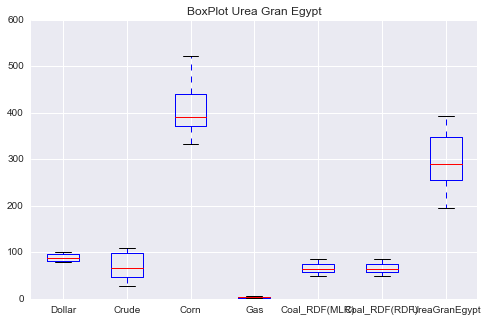

In [17]:
plt.show(egypt.plot(kind='box', figsize=(8,5),title=('BoxPlot Urea Gran Egypt')))

In [18]:
egypt.corr()
#gas most correlated

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranEgypt
Dollar,1.000000,-0.964485,-0.663102,-0.905450,-0.875990,-0.876971,-0.827814
Crude,-0.964485,1.000000,0.646934,0.899767,0.878869,0.876966,0.870320
Corn,-0.663102,0.646934,1.000000,0.614611,0.692592,0.690578,0.032948
Gas,-0.905450,0.899767,0.614611,1.000000,0.803247,0.799158,0.917669
Coal_RDF(MLR),-0.875990,0.878869,0.692592,0.803247,1.000000,0.998992,0.883619
Coal_RDF(RDF),-0.876971,0.876966,0.690578,0.799158,0.998992,1.000000,0.868151
UreaGranEgypt,-0.827814,0.870320,0.032948,0.917669,0.883619,0.868151,1.000000


In [52]:
egypt = egypt.dropna()
egyptnew = np.array(egypt)
egyptnew = pd.DataFrame(egyptnew)
egyptnew.columns = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','UreaGranEgypt']
egyptnew.head(2)

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranEgypt
0,6/13/2014,80.576,106.17,443,4.748,72.15,72.15,344
1,6/20/2014,80.372,106.83,448.25,4.552,72,72,330


In [21]:
#MLR all with coal_RDF(MLR)
X = egypt[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']]
Y = egypt[['UreaGranEgypt']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UreaGranEgypt   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     111.1
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           1.78e-30
Time:                        10:35:41   Log-Likelihood:                -303.29
No. Observations:                  71   AIC:                             618.6
Df Residuals:                      65   BIC:                             632.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          -210.9741    130.738     -1.614      0.111      -472.077    50.128
Dollar            2.8995      1.120      2.588      0.012         0.662     5.137
Crude            -0.3456      0.447     -0.773      0.442        -1.239     0.548
Corn             -0.4694      0.100     -4.675      0.000        -0.670    -0.269
Gas              54.5210      7.255      7.515      0.000        40.032    69.010
Coal_RDF(MLR)     4.6033      1.195      3.852      0.000         2.217     6.990
==============================================================================
Omnibus:                        1.084   Durbin-Watson:                   0.693
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                1.012
Skew:                           0.109   Prob(JB):                        0.603
Kurtosis:                       2.457   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#MLR all with coal_RDF(RDF)
X = egypt[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']]
Y = egypt[['UreaGranEgypt']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UreaGranEgypt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     102.2
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           1.99e-29
Time:                        10:36:53   Log-Likelihood:                -305.94
No. Observations:                  71   AIC:                             623.9
Df Residuals:                      65   BIC:                             637.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          -216.9033    139.812     -1.551      0.126      -496.126    62.320
Dollar            3.2212      1.174      2.744      0.008         0.877     5.565
Crude            -0.0172      0.439     -0.039      0.969        -0.894     0.859
Corn             -0.4289      0.103     -4.180      0.000        -0.634    -0.224
Gas              57.1236      7.449      7.669      0.000        42.248    72.000
Coal_RDF(RDF)     3.4637      1.148      3.016      0.004         1.170     5.757
==============================================================================
Omnibus:                        0.068   Durbin-Watson:                   0.698
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.251
Skew:                          -0.015   Prob(JB):                        0.882
Kurtosis:                       2.710   Cond. No.                     2.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#just use gas
#MLR all with coal_RDF(MLR)
X = egypt[['Gas']]
Y = egypt[['UreaGranEgypt']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UreaGranEgypt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     365.1
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           2.89e-29
Time:                        10:37:48   Log-Likelihood:                -318.10
No. Observations:                  71   AIC:                             640.2
Df Residuals:                      69   BIC:                             644.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        121.2904      9.484     12.789      0.000       102.371   140.210
Gas           57.1694      2.992     19.108      0.000        51.201    63.138
==============================================================================
Omnibus:                        4.678   Durbin-Watson:                   0.350
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                4.034
Skew:                          -0.574   Prob(JB):                        0.133
Kurtosis:                       3.214   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#using just coal, or dollar, or crude not as good as gas alone
#use gas and corn
X = egypt[['Corn','Gas']]
Y = egypt[['UreaGranEgypt']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UreaGranEgypt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     211.9
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           6.11e-30
Time:                        10:39:59   Log-Likelihood:                -313.15
No. Observations:                  71   AIC:                             632.3
Df Residuals:                      68   BIC:                             639.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        237.5257     37.539      6.327      0.000       162.618   312.434
Corn          -0.3225      0.101     -3.187      0.002        -0.524    -0.121
Gas           59.1456      2.879     20.546      0.000        53.401    64.890
==============================================================================
Omnibus:                        1.696   Durbin-Watson:                   0.492
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.696
Skew:                          -0.348   Prob(JB):                        0.428
Kurtosis:                       2.703   Cond. No.                     5.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#rdf all using coal_RDF(MLR)
X=egyptnew[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']].values
y=egyptnew['UreaGranEgypt'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(49, 5)

In [34]:
rdf_model_egypt = fit_predict_model(X_train,y_train)
print (rdf_model_egypt.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [54]:
#Best parameters model for Egypt
X=egyptnew[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']].values
y=egyptnew['UreaGranEgypt'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#can get rid of corn not important

MSE train: 25.426, test: 264.021
R^2 train: 0.992, test: 0.819
[ 0.1777824   0.28710188  0.01369078  0.2982385   0.22318645]


In [55]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
egyptnew['Egypt_Pred_RDF(MLR)'] = urea_predicted3
rdf_error3 = (abs(egyptnew['Egypt_Pred_RDF(MLR)'] - egyptnew['UreaGranEgypt'])/egyptnew['UreaGranEgypt'])*100
egyptnew['RDF(MLR)_Error'] = rdf_error3

mlrall = -210.9741 + (egyptnew['Dollar']*2.8995) - (egyptnew['Crude']*0.3456) - (egyptnew['Corn']*0.4694) + (egyptnew['Gas']*54.5210) + (egyptnew['Coal_RDF(MLR)']*4.6033)
egyptnew['Egypt_Pred_MLRAll(MLR)'] = mlrall
mlr_error4 = (abs(egyptnew['Egypt_Pred_MLRAll(MLR)']-egyptnew['UreaGranEgypt'])/egyptnew['UreaGranEgypt'])*100
egyptnew['MLRAll(MLR)_Error'] = mlr_error4

mlrcorngas = 237.5257 - (egyptnew['Corn']*0.3225) + (egyptnew['Gas']*59.1456)
egyptnew['Egypt_PredMLRcornGas'] = mlrcorngas
mlr_error5 = (abs(egyptnew['Egypt_PredMLRcornGas']-egyptnew['UreaGranEgypt'])/egyptnew['UreaGranEgypt'])*100
egyptnew['MLRcornGas_Error'] = mlr_error5

print("Average RDF(MLR) error is: %.3f" % (rdf_error3.mean())) 
print("Average MLRAll(MLR) error is: %.3f" % (mlr_error4.mean()))
print("Average MLRcornGas error is: %.3f" % (mlr_error5.mean()))
egyptnew

Average RDF(MLR) error is: 2.027
Average MLRAll(MLR) error is: 5.106
Average MLRcornGas error is: 5.786


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranEgypt,Egypt_Pred_RDF(MLR),RDF(MLR)_Error,Egypt_Pred_MLRAll(MLR),MLRAll(MLR)_Error,Egypt_PredMLRcornGas,MLRcornGas_Error
0,6/13/2014,80.576,106.17,443,4.748,72.15,72.15,344,338.685714,1.54485,369.013,7.2713,375.482,9.1516
1,6/20/2014,80.372,106.83,448.25,4.552,72,72,330,330.537143,0.162771,354.353,7.37961,362.196,9.75632
2,6/27/2014,80.039,105.04,442.25,4.389,71.9,71.9,328,330.531429,0.771777,347.475,5.93748,354.49,8.07625
3,7/4/2014,80.269,103.51,409.5,4.395,69.85,69.85,329,330.457143,0.442901,354.934,7.88262,365.407,11.0659
4,7/11/2014,80.187,100.3,378.25,4.136,69.65,69.65,333,333.200000,0.0600601,355.433,6.73651,360.166,8.15804
5,7/18/2014,80.524,101.95,378.5,3.955,69.1,69.1,333,336.542857,1.06392,343.322,3.0997,349.38,4.91901
6,7/25/2014,81.029,100.87,371.75,3.787,69.3,69.3,338,340.217143,0.655959,340.089,0.618071,341.621,1.07122
7,8/1/2014,81.302,96.94,362.25,3.822,68.95,68.95,343,349.640000,1.93586,346.995,1.16479,346.755,1.09462
8,8/8/2014,81.389,96.84,363.5,3.98,70.55,70.55,350,352.697143,0.770612,362.675,3.6214,355.696,1.62755
9,8/15/2014,81.424,95.32,377,3.807,70.25,70.25,355,354.891429,0.0305835,346.152,2.49249,341.11,3.91254


In [56]:
#rdf all using coal_RDF(RDF)
X=egyptnew[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']].values
y=egyptnew['UreaGranEgypt'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(49, 5)

In [41]:
rdf_model_egypt2 = fit_predict_model(X_train,y_train)
print (rdf_model_egypt2.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [57]:
X=egyptnew[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']].values
y=egyptnew['UreaGranEgypt'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#next model get rid of corn

MSE train: 27.080, test: 252.438
R^2 train: 0.991, test: 0.827
[ 0.19296824  0.28982835  0.01223771  0.2850632   0.2199025 ]


In [58]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
egyptnew['Egypt_Pred_RDF(RDF)'] = urea_predicted3
rdf_error3 = (abs(egyptnew['Egypt_Pred_RDF(RDF)'] - egyptnew['UreaGranEgypt'])/egyptnew['UreaGranEgypt'])*100
egyptnew['RDF(RDF)_Error'] = rdf_error3
print("Average RDF(RDF) error is: %.3f" % (rdf_error3.mean()))
egyptnew

Average RDF(RDF) error is: 2.068


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranEgypt,Egypt_Pred_RDF(MLR),RDF(MLR)_Error,Egypt_Pred_MLRAll(MLR),MLRAll(MLR)_Error,Egypt_PredMLRcornGas,MLRcornGas_Error,Egypt_Pred_RDF(RDF),RDF(RDF)_Error
0,6/13/2014,80.576,106.17,443,4.748,72.15,72.15,344,338.685714,1.54485,369.013,7.2713,375.482,9.1516,338.840,1.5
1,6/20/2014,80.372,106.83,448.25,4.552,72,72,330,330.537143,0.162771,354.353,7.37961,362.196,9.75632,330.540,0.163636
2,6/27/2014,80.039,105.04,442.25,4.389,71.9,71.9,328,330.531429,0.771777,347.475,5.93748,354.49,8.07625,330.450,0.746951
3,7/4/2014,80.269,103.51,409.5,4.395,69.85,69.85,329,330.457143,0.442901,354.934,7.88262,365.407,11.0659,330.900,0.577508
4,7/11/2014,80.187,100.3,378.25,4.136,69.65,69.65,333,333.200000,0.0600601,355.433,6.73651,360.166,8.15804,333.330,0.0990991
5,7/18/2014,80.524,101.95,378.5,3.955,69.1,69.1,333,336.542857,1.06392,343.322,3.0997,349.38,4.91901,335.480,0.744745
6,7/25/2014,81.029,100.87,371.75,3.787,69.3,69.3,338,340.217143,0.655959,340.089,0.618071,341.621,1.07122,339.770,0.523669
7,8/1/2014,81.302,96.94,362.25,3.822,68.95,68.95,343,349.640000,1.93586,346.995,1.16479,346.755,1.09462,350.180,2.09329
8,8/8/2014,81.389,96.84,363.5,3.98,70.55,70.55,350,352.697143,0.770612,362.675,3.6214,355.696,1.62755,351.795,0.512857
9,8/15/2014,81.424,95.32,377,3.807,70.25,70.25,355,354.891429,0.0305835,346.152,2.49249,341.11,3.91254,352.970,0.571831


In [59]:
#rdf model no corn
X=egyptnew[['Dollar','Crude','Gas','Coal_RDF(RDF)']].values
y=egyptnew['UreaGranEgypt'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(49, 4)

In [49]:
rdf_model_egypt3 = fit_predict_model(X_train,y_train)
print (rdf_model_egypt3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [61]:
X=egyptnew[['Dollar','Crude','Gas','Coal_RDF(RDF)']].values
y=egyptnew['UreaGranEgypt'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 30.390, test: 226.172
R^2 train: 0.990, test: 0.845
[ 0.25450293  0.33160532  0.23415767  0.17973408]


In [62]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
egyptnew['Egypt_Pred_RDF(RDF)noCorn'] = urea_predicted3
rdf_error3 = (abs(egyptnew['Egypt_Pred_RDF(RDF)noCorn'] - egyptnew['UreaGranEgypt'])/egyptnew['UreaGranEgypt'])*100
egyptnew['RDF(RDF)noCorn_Error'] = rdf_error3
print("Average RDF(RDF) no corn error is: %.3f" % (rdf_error3.mean()))
egyptnew

Average RDF(RDF) no corn error is: 2.003


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranEgypt,Egypt_Pred_RDF(MLR),RDF(MLR)_Error,Egypt_Pred_MLRAll(MLR),MLRAll(MLR)_Error,Egypt_PredMLRcornGas,MLRcornGas_Error,Egypt_Pred_RDF(RDF),RDF(RDF)_Error,Egypt_Pred_RDF(RDF)noCorn,RDF(RDF)noCorn_Error
0,6/13/2014,80.576,106.17,443,4.748,72.15,72.15,344,338.685714,1.54485,369.013,7.2713,375.482,9.1516,338.840,1.5,339.580000,1.28488
1,6/20/2014,80.372,106.83,448.25,4.552,72,72,330,330.537143,0.162771,354.353,7.37961,362.196,9.75632,330.540,0.163636,331.746667,0.529293
2,6/27/2014,80.039,105.04,442.25,4.389,71.9,71.9,328,330.531429,0.771777,347.475,5.93748,354.49,8.07625,330.450,0.746951,331.640000,1.10976
3,7/4/2014,80.269,103.51,409.5,4.395,69.85,69.85,329,330.457143,0.442901,354.934,7.88262,365.407,11.0659,330.900,0.577508,330.793333,0.545086
4,7/11/2014,80.187,100.3,378.25,4.136,69.65,69.65,333,333.200000,0.0600601,355.433,6.73651,360.166,8.15804,333.330,0.0990991,332.953333,0.014014
5,7/18/2014,80.524,101.95,378.5,3.955,69.1,69.1,333,336.542857,1.06392,343.322,3.0997,349.38,4.91901,335.480,0.744745,335.440000,0.732733
6,7/25/2014,81.029,100.87,371.75,3.787,69.3,69.3,338,340.217143,0.655959,340.089,0.618071,341.621,1.07122,339.770,0.523669,339.586667,0.469428
7,8/1/2014,81.302,96.94,362.25,3.822,68.95,68.95,343,349.640000,1.93586,346.995,1.16479,346.755,1.09462,350.180,2.09329,347.060000,1.18367
8,8/8/2014,81.389,96.84,363.5,3.98,70.55,70.55,350,352.697143,0.770612,362.675,3.6214,355.696,1.62755,351.795,0.512857,350.943333,0.269524
9,8/15/2014,81.424,95.32,377,3.807,70.25,70.25,355,354.891429,0.0305835,346.152,2.49249,341.11,3.91254,352.970,0.571831,355.046667,0.0131455


In [ ]:
#add predictions part

In [ ]:
#new predictions made here

In [ ]:
#combine frames of original and predictions

In [ ]:
#save combined file to csv

In [ ]:
#split combined into monthly chunks

In [ ]:
#graph all models and then put in daily format

### Since coal missing lots of data I won't use it

In [63]:
egypt1 = original[['Date','Dollar','Crude','Corn','Gas','UreaGranEgypt']]
print(egypt1.shape)
egypt1 = egypt1.dropna()
egyptnew1 = np.array(egypt1)
egyptnew1 = pd.DataFrame(egyptnew1)
egyptnew1.columns = ['Date','Dollar','Crude','Corn','Gas','UreaGranEgypt']
egyptnew1.head(2)

(685, 6)


,Date,Dollar,Crude,Corn,Gas,UreaGranEgypt
0,6/13/2014,80.576,106.17,443,4.748,344
1,6/16/2014,80.471,106.3,436.75,4.718,340


In [65]:
from datetime import datetime
egyptnew1['Date'] = pd.to_datetime(egyptnew1['Date'])
date = egyptnew1['Date']
egyptnew1.dtypes

Date             datetime64[ns]
Dollar                   object
Crude                    object
Corn                     object
Gas                      object
UreaGranEgypt            object
dtype: object

In [64]:
egypt1.corr()
#gas most correlated

,Dollar,Crude,Corn,Gas,UreaGranEgypt
Dollar,1.000000,-0.959180,-0.062507,-0.908106,-0.827814
Crude,-0.959180,1.000000,0.064323,0.925009,0.870320
Corn,-0.062507,0.064323,1.000000,0.175623,0.032948
Gas,-0.908106,0.925009,0.175623,1.000000,0.917669
UreaGranEgypt,-0.827814,0.870320,0.032948,0.917669,1.000000


In [66]:
#mlr all
X = egypt1[['Dollar','Crude','Corn','Gas']]
Y= egypt1[['UreaGranEgypt']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UreaGranEgypt   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     555.3
Date:                Thu, 21 Apr 2016   Prob (F-statistic):          3.82e-147
Time:                        11:28:35   Log-Likelihood:                -1502.1
No. Observations:                 343   AIC:                             3014.
Df Residuals:                     338   BIC:                             3033.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -51.3441     63.896     -0.804      0.422      -177.028    74.340
Dollar         2.6302      0.570      4.615      0.000         1.509     3.751
Crude          0.7335      0.176      4.179      0.000         0.388     1.079
Corn          -0.3091      0.049     -6.319      0.000        -0.405    -0.213
Gas           58.1049      3.473     16.728      0.000        51.273    64.937
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   0.148
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                6.231
Skew:                          -0.149   Prob(JB):                       0.0444
Kurtosis:                       3.589   Cond. No.                     2.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
#mlr just gas, since all highly correlated and do same with dollar and crude
#gas alone had highest R^2
X = egypt1[['Gas']]
Y= egypt1[['UreaGranEgypt']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UreaGranEgypt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     1819.
Date:                Thu, 21 Apr 2016   Prob (F-statistic):          9.74e-139
Time:                        11:29:52   Log-Likelihood:                -1532.7
No. Observations:                 343   AIC:                             3069.
Df Residuals:                     341   BIC:                             3077.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        121.5873      4.270     28.472      0.000       113.188   129.987
Gas           57.1091      1.339     42.648      0.000        54.475    59.743
==============================================================================
Omnibus:                       24.012   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.989
Skew:                          -0.663   Prob(JB):                     1.38e-06
Kurtosis:                       3.360   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
#gas and corn since not correlated to each other
X = egypt1[['Corn','Gas']]
Y= egypt1[['UreaGranEgypt']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UreaGranEgypt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1036.
Date:                Thu, 21 Apr 2016   Prob (F-statistic):          2.12e-145
Time:                        11:30:23   Log-Likelihood:                -1513.2
No. Observations:                 343   AIC:                             3032.
Df Residuals:                     340   BIC:                             3044.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        234.8044     18.153     12.935      0.000       199.098   270.511
Corn          -0.3104      0.049     -6.397      0.000        -0.406    -0.215
Gas           58.5551      1.287     45.498      0.000        56.024    61.087
==============================================================================
Omnibus:                        9.464   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.849
Skew:                          -0.413   Prob(JB):                      0.00726
Kurtosis:                       2.921   Cond. No.                     6.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
#rdf all
X = egyptnew1[['Dollar','Crude','Corn','Gas']].values
y = egyptnew1['UreaGranEgypt'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [74]:
rdf_model_egypt4 = fit_predict_model(X_train,y_train)
print (rdf_model_egypt4.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [75]:
X=egyptnew1[['Dollar','Crude','Corn','Gas']].values
y=egyptnew1['UreaGranEgypt'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#get rid of corn in next model

MSE train: 7.376, test: 43.272
R^2 train: 0.997, test: 0.985
[ 0.47334105  0.16049334  0.01763335  0.34853226]


In [76]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
egyptnew1['Egypt_Pred_RDFAll'] = urea_predicted3
rdf_error3 = (abs(egyptnew1['Egypt_Pred_RDFAll'] - egyptnew1['UreaGranEgypt'])/egyptnew1['UreaGranEgypt'])*100
egyptnew1['RDFAll_Error'] = rdf_error3

mlrall = -51.3441 + (egyptnew1['Dollar']*2.6302) +(egyptnew1['Crude']*0.7335) - (egyptnew1['Corn']*0.3091) + (egyptnew1['Gas']*58.1049) 
egyptnew1['Egypt_Pred_MLRAll'] = mlrall
mlr_error4 = (abs(egyptnew1['Egypt_Pred_MLRAll'] - egyptnew1['UreaGranEgypt'])/egyptnew1['UreaGranEgypt'])*100
egyptnew1['MLRAll_Error'] = mlr_error4

mlrcorngas = 234.8044 - (egyptnew1['Corn']*0.3104) + (egyptnew1['Gas']*58.5551)
egyptnew1['Egypt_Pred_MLRcornGas']= mlrcorngas
mlr_error5 = (abs(egyptnew1['Egypt_Pred_MLRcornGas'] - egyptnew1['UreaGranEgypt'])/egyptnew1['UreaGranEgypt'])*100
egyptnew1['MLRcornGas_Error'] = mlr_error5

print("Average RDFAll error is: %.3f" % (rdf_error3.mean())) 
print("Average MLRAll error is: %.3f" % (mlr_error4.mean()))
print("Average MLRcornGas error is: %.3f" % (mlr_error5.mean()))
egyptnew1

Average RDFAll error is: 0.869
Average MLRAll error is: 5.191
Average MLRcornGas error is: 5.653


,Date,Dollar,Crude,Corn,Gas,UreaGranEgypt,Egypt_Pred_RDFAll,RDFAll_Error,Egypt_Pred_MLRAll,MLRAll_Error,Egypt_Pred_MLRcornGas,MLRcornGas_Error
0,2014-06-13,80.576,106.17,443,4.748,344,336.377143,2.21595,377.413,9.71318,375.317,9.10373
1,2014-06-16,80.471,106.3,436.75,4.718,340,336.914286,0.907563,377.421,11.0063,375.5,10.4412
2,2014-06-17,80.629,105.87,434,4.722,335,335.125714,0.0375267,378.604,13.0161,376.588,12.4143
3,2014-06-18,80.584,105.59,435.5,4.675,332,333.171429,0.35284,375.086,12.9776,373.37,12.4609
4,2014-06-19,80.317,106.05,444.25,4.603,330,329.617143,0.116017,367.833,11.4644,366.438,11.0419
5,2014-06-20,80.372,106.83,448.25,4.552,330,331.508571,0.457143,364.35,10.409,362.21,9.76073
6,2014-06-23,80.272,105.42,439,4.468,332,329.005714,0.901893,361.031,8.74418,360.163,8.48283
7,2014-06-24,80.327,105.32,436.75,4.556,329,329.411429,0.125054,366.911,11.523,366.014,11.2505
8,2014-06-25,80.225,105.72,435.75,4.569,328,328.640000,0.195122,368,12.1952,367.086,11.9164
9,2014-06-26,80.22,105.11,439,4.441,330,328.834286,0.353247,359.098,8.81748,358.582,8.66121


In [77]:
#rdf no corn
X = egyptnew1[['Dollar','Crude','Gas']].values
y = egyptnew1['UreaGranEgypt'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [82]:
rdf_model_egypt5 = fit_predict_model(X_train,y_train)
print (rdf_model_egypt5.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [83]:
X=egyptnew1[['Dollar','Crude','Gas']].values
y=egyptnew1['UreaGranEgypt'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 9.017, test: 78.297
R^2 train: 0.997, test: 0.973
[ 0.38458861  0.1650494   0.45036199]


In [84]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
egyptnew1['Egypt_Pred_RDFnoCorn'] = urea_predicted3
rdf_error3 = (abs(egyptnew1['Egypt_Pred_RDFnoCorn'] - egyptnew1['UreaGranEgypt'])/egyptnew1['UreaGranEgypt'])*100
egyptnew1['RDFAll_Error'] = rdf_error3
print("Average RDF no corn error is: %.3f" % (rdf_error3.mean()))
egyptnew1

Average RDF no corn error is: 1.037


,Date,Dollar,Crude,Corn,Gas,UreaGranEgypt,Egypt_Pred_RDFAll,RDFAll_Error,Egypt_Pred_MLRAll,MLRAll_Error,Egypt_Pred_MLRcornGas,MLRcornGas_Error,Egypt_Pred_RDFnoCorn
0,2014-06-13,80.576,106.17,443,4.748,344,336.377143,2.0186,377.413,9.71318,375.317,9.10373,337.056000
1,2014-06-16,80.471,106.3,436.75,4.718,340,336.914286,0.656471,377.421,11.0063,375.5,10.4412,337.768000
2,2014-06-17,80.629,105.87,434,4.722,335,335.125714,0.0955224,378.604,13.0161,376.588,12.4143,335.320000
3,2014-06-18,80.584,105.59,435.5,4.675,332,333.171429,0.296386,375.086,12.9776,373.37,12.4609,332.984000
4,2014-06-19,80.317,106.05,444.25,4.603,330,329.617143,0.106667,367.833,11.4644,366.438,11.0419,329.648000
5,2014-06-20,80.372,106.83,448.25,4.552,330,331.508571,0.409697,364.35,10.409,362.21,9.76073,331.352000
6,2014-06-23,80.272,105.42,439,4.468,332,329.005714,0.927711,361.031,8.74418,360.163,8.48283,328.920000
7,2014-06-24,80.327,105.32,436.75,4.556,329,329.411429,0.0802432,366.911,11.523,366.014,11.2505,329.264000
8,2014-06-25,80.225,105.72,435.75,4.569,328,328.640000,0.204878,368,12.1952,367.086,11.9164,328.672000
9,2014-06-26,80.22,105.11,439,4.441,330,328.834286,0.4,359.098,8.81748,358.582,8.66121,328.680000


In [ ]:
#add predictions part

In [ ]:
#new predictions made

In [ ]:
#combine frames of  predicted and original

In [ ]:
#save combined file to csv

In [ ]:
#split into monthly chunks

In [ ]:
#graph all models out and put in daily form

## Urea Gran Brazil
[Top](#Table-of-Contents)

In [2]:
brazil = original[['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','UreaGranBrazil']]
print(brazil.shape)
brazil.describe()

(685, 8)


,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranBrazil
count,685.000000,685.000000,685.000000,685.000000,139.000000,139.000000,227.000000
mean,88.903893,72.101577,407.081387,3.378517,65.881478,65.945891,258.132159
std,7.625408,26.180188,44.250347,0.867233,10.547816,10.480078,39.699872
min,79.093000,28.350000,333.500000,1.767000,48.800000,48.800000,180.000000
25%,80.658000,47.040000,371.500000,2.712000,58.300000,58.319138,230.000000
50%,88.460000,65.960000,391.000000,3.415000,64.100000,64.100000,267.000000
75%,96.310000,98.900000,439.500000,4.136000,74.250000,74.250000,284.000000
max,100.330000,109.520000,521.500000,5.465000,86.500000,86.500000,319.000000


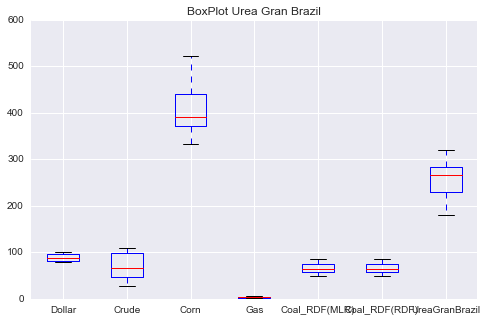

In [87]:
plt.show(brazil.plot(kind='box', figsize=(8,5),title=('BoxPlot Urea Gran Brazil')))

In [88]:
brazil.corr() #crude, gas, coal

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranBrazil
Dollar,1.000000,-0.964485,-0.663102,-0.905450,-0.875990,-0.876971,-0.381939
Crude,-0.964485,1.000000,0.646934,0.899767,0.878869,0.876966,0.857737
Corn,-0.663102,0.646934,1.000000,0.614611,0.692592,0.690578,0.307605
Gas,-0.905450,0.899767,0.614611,1.000000,0.803247,0.799158,0.873264
Coal_RDF(MLR),-0.875990,0.878869,0.692592,0.803247,1.000000,0.998992,0.828356
Coal_RDF(RDF),-0.876971,0.876966,0.690578,0.799158,0.998992,1.000000,0.766333
UreaGranBrazil,-0.381939,0.857737,0.307605,0.873264,0.828356,0.766333,1.000000


In [3]:
brazil = brazil.dropna()
brazilnew = np.array(brazil)
brazilnew = pd.DataFrame(brazilnew)
brazilnew.columns = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','UreaGranBrazil']
brazilnew.head(2)

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranBrazil
0,5/22/2015,96.014,60.15,366.75,2.919,60,60,318
1,5/29/2015,96.907,60.6,357.25,2.665,60.05,60.05,319


In [90]:
#MLR all with coal_RDF(MLR)
X = brazil[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']]
Y = brazil[['UreaGranBrazil']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UreaGranBrazil   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     50.68
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           1.73e-16
Time:                        12:16:18   Log-Likelihood:                -193.78
No. Observations:                  47   AIC:                             399.6
Df Residuals:                      41   BIC:                             410.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          -411.3555    188.269     -2.185      0.035      -791.573   -31.138
Dollar            4.1051      1.705      2.408      0.021         0.662     7.548
Crude             2.0264      0.504      4.021      0.000         1.009     3.044
Corn             -0.2289      0.144     -1.588      0.120        -0.520     0.062
Gas              48.6268     13.080      3.718      0.001        22.211    75.042
Coal_RDF(MLR)     2.6869      1.228      2.188      0.034         0.206     5.167
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   0.626
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                1.686
Skew:                          -0.163   Prob(JB):                        0.431
Kurtosis:                       3.868   Cond. No.                     3.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
#mlr no dollar or corn
#also I tried individual variables and that was bad
X = brazil[['Crude','Gas','Coal_RDF(MLR)']]
Y = brazil[['UreaGranBrazil']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UreaGranBrazil   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     72.11
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           8.15e-17
Time:                        12:19:21   Log-Likelihood:                -197.88
No. Observations:                  47   AIC:                             403.8
Df Residuals:                      43   BIC:                             411.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           -42.9817     44.232     -0.972      0.337      -132.185    46.221
Crude             1.8804      0.527      3.568      0.001         0.818     2.943
Gas              48.9818     13.063      3.750      0.001        22.637    75.326
Coal_RDF(MLR)     1.7433      1.252      1.393      0.171        -0.781     4.267
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   0.449
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.149
Skew:                          -0.137   Prob(JB):                        0.928
Kurtosis:                       2.966   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
#rdf all using coal_rdf(mlr)
X=brazilnew[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']].values
y=brazilnew['UreaGranBrazil'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(32, 5)

In [100]:
rdf_model_brazil = fit_predict_model(X_train,y_train)
print (rdf_model_brazil.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [5]:
#Best parameters model for Brazil
X=brazilnew[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']].values
y=brazilnew['UreaGranBrazil'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#dollar and corn least important

MSE train: 35.732, test: 253.913
R^2 train: 0.977, test: 0.839
[ 0.03397215  0.38306334  0.02396454  0.3451317   0.21386827]


In [6]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
brazilnew['Brazil_Pred_RDF(MLR)'] = urea_predicted3
rdf_error3 = (abs(brazilnew['Brazil_Pred_RDF(MLR)'] - brazilnew['UreaGranBrazil'])/brazilnew['UreaGranBrazil'])*100
brazilnew['RDF(MLR)_Error'] = rdf_error3

mlrall = -411.3555 + (brazilnew['Dollar']*4.1051) + (brazilnew['Crude']*2.0264) - (brazilnew['Corn']*0.2289) + (brazilnew['Gas']*48.6268) + (brazilnew['Coal_RDF(MLR)']*2.6869)
brazilnew['Brazil_Pred_MLRAll(MLR)'] = mlrall
mlr_error4 = (abs(brazilnew['Brazil_Pred_MLRAll(MLR)']-brazilnew['UreaGranBrazil'])/brazilnew['UreaGranBrazil'])*100
brazilnew['MLRAll(MLR)_Error'] = mlr_error4

mlrnodollarcorn = -42.9817 + (brazilnew['Crude']*1.8804) + (brazilnew['Gas']*48.9818) + (brazilnew['Coal_RDF(MLR)']*1.7433)
brazilnew['Brazil_PredMLRnoDollarCorn'] = mlrnodollarcorn
mlr_error5 = (abs(brazilnew['Brazil_PredMLRnoDollarCorn']-brazilnew['UreaGranBrazil'])/brazilnew['UreaGranBrazil'])*100
brazilnew['MLRnoDollarCorn_Error'] = mlr_error5

print("Average RDF(MLR) error is: %.3f" % (rdf_error3.mean())) 
print("Average MLRAll(MLR) error is: %.3f" % (mlr_error4.mean()))
print("Average MLRnoDollarCorn error is: %.3f" % (mlr_error5.mean()))
brazilnew

Average RDF(MLR) error is: 2.933
Average MLRAll(MLR) error is: 4.833
Average MLRnoDollarCorn error is: 5.466


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranBrazil,Brazil_Pred_RDF(MLR),RDF(MLR)_Error,Brazil_Pred_MLRAll(MLR),MLRAll(MLR)_Error,Brazil_PredMLRnoDollarCorn,MLRnoDollarCorn_Error
0,5/22/2015,96.014,60.15,366.75,2.919,60,60,318,312.429333,1.75178,323.886,1.85097,317.7,0.094266
1,5/29/2015,96.907,60.6,357.25,2.665,60.05,60.05,319,314.483429,1.41585,318.422,0.181346,306.192,4.01498
2,6/5/2015,96.306,59.56,367.5,2.621,58.1,58.1,312,297.459429,4.66044,304.122,2.52512,298.682,4.26861
3,6/12/2015,94.972,60.4,358.75,2.776,60,60,314,310.920000,0.980892,314.993,0.316159,311.166,0.902568
4,6/19/2015,94.085,59.97,358.75,2.84,60.2,60.2,308,307.968000,0.0103896,314.13,1.99015,313.841,1.89638
5,6/26/2015,95.472,59.97,392.5,2.77,60.2,60.2,305,304.032000,0.317377,308.694,1.21121,310.412,1.77447
6,7/3/2015,96.113,57.3,428.5,2.837,60.15,60.15,284,291.840000,2.76056,300.798,5.9149,308.586,8.65707
7,7/10/2015,96.025,53.22,434.75,2.78,60.3,60.3,284,284.004444,0.00156495,288.37,1.53874,298.384,5.06464
8,7/17/2015,97.862,51.21,431.25,2.874,60.3,60.3,284,283.764444,0.0829421,297.21,4.65145,299.208,5.35502
9,7/24/2015,97.244,48.61,402.75,2.775,60.4,60.4,284,283.617778,0.134585,291.383,2.59958,289.644,1.98745


In [8]:
#rdf all using coal_rdf(rdf)
X=brazilnew[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']].values
y=brazilnew['UreaGranBrazil'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(32, 5)

In [14]:
rdf_model_brazil2 = fit_predict_model(X_train,y_train)
print (rdf_model_brazil2.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [16]:
#Best parameters model for Brazil
X=brazilnew[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']].values
y=brazilnew['UreaGranBrazil'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#dollar and corn least important

MSE train: 31.843, test: 280.034
R^2 train: 0.979, test: 0.823
[ 0.03818138  0.35302735  0.03036768  0.3999014   0.17852218]


In [17]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
brazilnew['Brazil_Pred_RDF(RDF)'] = urea_predicted3
rdf_error3 = (abs(brazilnew['Brazil_Pred_RDF(RDF)'] - brazilnew['UreaGranBrazil'])/brazilnew['UreaGranBrazil'])*100
brazilnew['RDF(RDF)_Error'] = rdf_error3
print("Average RDF(RDF) error is: %.3f" % (rdf_error3.mean())) 
brazilnew

Average RDF(RDF) error is: 2.863


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UreaGranBrazil,Brazil_Pred_RDF(MLR),RDF(MLR)_Error,Brazil_Pred_MLRAll(MLR),MLRAll(MLR)_Error,Brazil_PredMLRnoDollarCorn,MLRnoDollarCorn_Error,Brazil_Pred_RDF(RDF),RDF(RDF)_Error
0,5/22/2015,96.014,60.15,366.75,2.919,60,60,318,312.429333,1.75178,323.886,1.85097,317.7,0.094266,312.720,1.66038
1,5/29/2015,96.907,60.6,357.25,2.665,60.05,60.05,319,314.483429,1.41585,318.422,0.181346,306.192,4.01498,312.856,1.92602
2,6/5/2015,96.306,59.56,367.5,2.621,58.1,58.1,312,297.459429,4.66044,304.122,2.52512,298.682,4.26861,297.368,4.68974
3,6/12/2015,94.972,60.4,358.75,2.776,60,60,314,310.920000,0.980892,314.993,0.316159,311.166,0.902568,310.816,1.01401
4,6/19/2015,94.085,59.97,358.75,2.84,60.2,60.2,308,307.968000,0.0103896,314.13,1.99015,313.841,1.89638,307.888,0.0363636
5,6/26/2015,95.472,59.97,392.5,2.77,60.2,60.2,305,304.032000,0.317377,308.694,1.21121,310.412,1.77447,303.392,0.527213
6,7/3/2015,96.113,57.3,428.5,2.837,60.15,60.15,284,291.840000,2.76056,300.798,5.9149,308.586,8.65707,293.400,3.30986
7,7/10/2015,96.025,53.22,434.75,2.78,60.3,60.3,284,284.004444,0.00156495,288.37,1.53874,298.384,5.06464,284.448,0.157746
8,7/17/2015,97.862,51.21,431.25,2.874,60.3,60.3,284,283.764444,0.0829421,297.21,4.65145,299.208,5.35502,284.440,0.15493
9,7/24/2015,97.244,48.61,402.75,2.775,60.4,60.4,284,283.617778,0.134585,291.383,2.59958,289.644,1.98745,283.656,0.121127


In [18]:
#rdf no dollar or corn since they were the least important
X=brazilnew[['Crude','Gas','Coal_RDF(RDF)']].values
y=brazilnew['UreaGranBrazil'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(32, 3)

In [22]:
rdf_model_brazil3 = fit_predict_model(X_train,y_train)
print (rdf_model_brazil3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [23]:
X=brazilnew[['Crude','Gas','Coal_RDF(RDF)']].values
y=brazilnew['UreaGranBrazil'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 36.976, test: 229.980
R^2 train: 0.976, test: 0.854
[ 0.38797356  0.43303337  0.17899307]


In [ ]:
#add predictions part

In [ ]:
#new predictions made using models

In [ ]:
#combine frames of original and predicted part

In [ ]:
#save combined file to csv

In [ ]:
#split into monthly chunks

In [ ]:
#graph all models out and then put in daily format

### Since coal is missing a decent amount of data I will make models without it

In [25]:
brazil1 = original[['Date','Dollar','Crude','Corn','Gas','UreaGranBrazil']]
print(brazil1.shape)
brazil1 = brazil1.dropna()
brazilnew1 = np.array(brazil1)
brazilnew1 = pd.DataFrame(brazilnew1)
brazilnew1.columns = ['Date','Dollar','Crude','Corn','Gas','UreaGranBrazil']
brazilnew1.head(2)

(685, 6)


,Date,Dollar,Crude,Corn,Gas,UreaGranBrazil
0,5/18/2015,94.221,60.24,375.25,3.061,317
1,5/19/2015,95.267,57.99,369.25,2.991,317


In [27]:
from datetime import datetime
brazilnew1['Date'] = pd.to_datetime(brazilnew1['Date'])
date = brazilnew1['Date']
brazilnew1.dtypes

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
Gas                       object
UreaGranBrazil            object
dtype: object

In [26]:
brazil1.corr()
#crude and gas most correlated however those two variables correlated to each other

,Dollar,Crude,Corn,Gas,UreaGranBrazil
Dollar,1.000000,-0.498635,-0.159451,-0.422013,-0.381939
Crude,-0.498635,1.000000,0.310661,0.767701,0.857737
Corn,-0.159451,0.310661,1.000000,0.438067,0.307605
Gas,-0.422013,0.767701,0.438067,1.000000,0.873264
UreaGranBrazil,-0.381939,0.857737,0.307605,0.873264,1.000000


In [29]:
#mlr all
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = brazil1[['Dollar','Crude','Corn','Gas']]
Y= brazil1[['UreaGranBrazil']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UreaGranBrazil   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     338.4
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           3.29e-93
Time:                        11:30:07   Log-Likelihood:                -934.85
No. Observations:                 227   AIC:                             1880.
Df Residuals:                     222   BIC:                             1897.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -157.1722     78.248     -2.009      0.046      -311.375    -2.969
Dollar         2.3162      0.748      3.095      0.002         0.841     3.791
Crude          2.2451      0.189     11.868      0.000         1.872     2.618
Corn          -0.1722      0.060     -2.853      0.005        -0.291    -0.053
Gas           63.4678      4.641     13.674      0.000        54.321    72.615
==============================================================================
Omnibus:                       10.724   Durbin-Watson:                   0.163
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               21.180
Skew:                           0.152   Prob(JB):                     2.52e-05
Kurtosis:                       4.465   Cond. No.                     3.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#mlr get rid of crude R^2= 0.77 crude more important
X = brazil1[['Gas']]
Y= brazil1[['UreaGranBrazil']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UreaGranBrazil   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     722.7
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           3.37e-72
Time:                        11:37:17   Log-Likelihood:                -994.06
No. Observations:                 227   AIC:                             1992.
Df Residuals:                     225   BIC:                             1999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         18.8745      8.992      2.099      0.037         1.155    36.594
Gas           97.1414      3.613     26.884      0.000        90.021   104.262
==============================================================================
Omnibus:                        4.484   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                4.644
Skew:                          -0.204   Prob(JB):                       0.0981
Kurtosis:                       3.570   Cond. No.                         20.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#mlr get rid of gas .74 and now .736 with just crude
X = brazil1[['Crude']]
Y= brazil1[['UreaGranBrazil']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UreaGranBrazil   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     626.3
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           5.95e-67
Time:                        11:38:00   Log-Likelihood:                -1006.2
No. Observations:                 227   AIC:                             2016.
Df Residuals:                     225   BIC:                             2023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         83.3962      7.113     11.725      0.000        69.380    97.412
Crude          3.9335      0.157     25.027      0.000         3.624     4.243
==============================================================================
Omnibus:                        3.699   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.678
Skew:                          -0.177   Prob(JB):                        0.159
Kurtosis:                       3.514   Cond. No.                         237.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#rdf all
X = brazilnew1[['Dollar','Crude','Corn','Gas']].values
y = brazilnew1['UreaGranBrazil'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [39]:
rdf_model_brazil3 = fit_predict_model(X_train,y_train)
print (rdf_model_brazil3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [41]:
X=brazilnew1[['Dollar','Crude','Corn','Gas']].values
y=brazilnew1['UreaGranBrazil'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#crude and gas inmportant

MSE train: 13.238, test: 132.386
R^2 train: 0.992, test: 0.915
[ 0.05966831  0.23050898  0.03768021  0.6721425 ]


In [42]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
brazilnew1['Brazil_Pred_RDFAll'] = urea_predicted3
rdf_error3 = (abs(brazilnew1['Brazil_Pred_RDFAll'] - brazilnew1['UreaGranBrazil'])/brazilnew1['UreaGranBrazil'])*100
brazilnew1['RDFAll_Error'] = rdf_error3

mlrall = -157.1722 + (brazilnew1['Dollar']*2.3162) +(brazilnew1['Crude']*2.2451) - (brazilnew1['Corn']*0.1722) + (brazilnew1['Gas']*63.4678) 
brazilnew1['Brazil_Pred_MLRAll'] = mlrall
mlr_error4 = (abs(brazilnew1['Brazil_Pred_MLRAll'] - brazilnew1['UreaGranBrazil'])/brazilnew1['UreaGranBrazil'])*100
brazilnew1['MLRAll_Error'] = mlr_error4

print("Average RDFAll error is: %.3f" % (rdf_error3.mean())) 
print("Average MLRAll error is: %.3f" % (mlr_error4.mean()))
brazilnew1

Average RDFAll error is: 1.475
Average MLRAll error is: 4.445


,Date,Dollar,Crude,Corn,Gas,UreaGranBrazil,Brazil_Pred_RDFAll,RDFAll_Error,Brazil_Pred_MLRAll,MLRAll_Error
0,2015-05-18,94.221,60.24,375.25,3.061,317,312.872000,1.30221,325.964,2.82782
1,2015-05-19,95.267,57.99,369.25,2.991,317,316.648000,0.111041,319.926,0.923001
2,2015-05-20,95.448,59.47,366.75,2.959,317,316.624000,0.118612,322.067,1.59856
3,2015-05-21,95.255,61.15,371.5,2.994,318,316.264000,0.545912,326.796,2.76591
4,2015-05-22,96.014,60.15,366.75,2.919,318,316.800000,0.377358,322.366,1.37307
5,2015-05-25,96.014,60.15,366.75,2.919,318,316.800000,0.377358,322.366,1.37307
6,2015-05-26,97.299,58.48,362,2.849,318,316.712000,0.405031,317.969,0.00988868
7,2015-05-27,97.371,57.86,355.75,2.847,318,316.872000,0.354717,317.693,0.0966438
8,2015-05-28,96.965,58.02,359.5,2.73,319,316.592000,0.754859,309.04,3.12225
9,2015-05-29,96.907,60.6,357.25,2.665,319,315.552000,1.08088,310.96,2.52035


In [43]:
#rdf using crude and gas
X = brazilnew1[['Crude','Gas']].values
y = brazilnew1['UreaGranBrazil'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [45]:
rdf_model_brazil4 = fit_predict_model(X_train,y_train)
print (rdf_model_brazil4.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [46]:
X=brazilnew1[['Crude','Gas']].values
y=brazilnew1['UreaGranBrazil'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 39.068, test: 122.569
R^2 train: 0.975, test: 0.921
[ 0.26707282  0.73292718]


In [47]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
brazilnew1['Brazil_Pred_RDFcrudeGas'] = urea_predicted3
rdf_error3 = (abs(brazilnew1['Brazil_Pred_RDFcrudeGas'] - brazilnew1['UreaGranBrazil'])/brazilnew1['UreaGranBrazil'])*100
brazilnew1['RDFcrudeGas_Error'] = rdf_error3
print("Average RDFcrudeGas error is: %.3f" % (rdf_error3.mean()))
brazilnew1

Average RDFcrudeGas error is: 2.252


,Date,Dollar,Crude,Corn,Gas,UreaGranBrazil,Brazil_Pred_RDFAll,RDFAll_Error,Brazil_Pred_MLRAll,MLRAll_Error,Brazil_Pred_RDFcrudeGas,RDFcrudeGas_Error
0,2015-05-18,94.221,60.24,375.25,3.061,317,312.872000,1.30221,325.964,2.82782,316.341793,0.207636
1,2015-05-19,95.267,57.99,369.25,2.991,317,316.648000,0.111041,319.926,0.923001,317.367369,0.115889
2,2015-05-20,95.448,59.47,366.75,2.959,317,316.624000,0.118612,322.067,1.59856,316.441960,0.176038
3,2015-05-21,95.255,61.15,371.5,2.994,318,316.264000,0.545912,326.796,2.76591,316.024293,0.621291
4,2015-05-22,96.014,60.15,366.75,2.919,318,316.800000,0.377358,322.366,1.37307,315.395915,0.818895
5,2015-05-25,96.014,60.15,366.75,2.919,318,316.800000,0.377358,322.366,1.37307,315.395915,0.818895
6,2015-05-26,97.299,58.48,362,2.849,318,316.712000,0.405031,317.969,0.00988868,313.535338,1.40398
7,2015-05-27,97.371,57.86,355.75,2.847,318,316.872000,0.354717,317.693,0.0966438,316.219407,0.559935
8,2015-05-28,96.965,58.02,359.5,2.73,319,316.592000,0.754859,309.04,3.12225,315.500037,1.09717
9,2015-05-29,96.907,60.6,357.25,2.665,319,315.552000,1.08088,310.96,2.52035,312.982828,1.88626


In [ ]:
#add predictions part

In [ ]:
#new predictions made

In [ ]:
#combine frames of predictions and original

In [ ]:
#save combined file to csv

In [ ]:
#split into monthly chunks

In [ ]:
#graph all models out and put in daily format

## Rouen UAN
[Top](#Table-of-Contents)

In [48]:
rouen = original[['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','UANRouen']]
print(rouen.shape)
rouen.describe()

(685, 8)


,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UANRouen
count,685.000000,685.000000,685.000000,685.000000,139.000000,139.000000,195.000000
mean,88.903893,72.101577,407.081387,3.378517,65.881478,65.945891,183.938462
std,7.625408,26.180188,44.250347,0.867233,10.547816,10.480078,21.886924
min,79.093000,28.350000,333.500000,1.767000,48.800000,48.800000,149.000000
25%,80.658000,47.040000,371.500000,2.712000,58.300000,58.319138,168.000000
50%,88.460000,65.960000,391.000000,3.415000,64.100000,64.100000,184.000000
75%,96.310000,98.900000,439.500000,4.136000,74.250000,74.250000,192.000000
max,100.330000,109.520000,521.500000,5.465000,86.500000,86.500000,229.000000


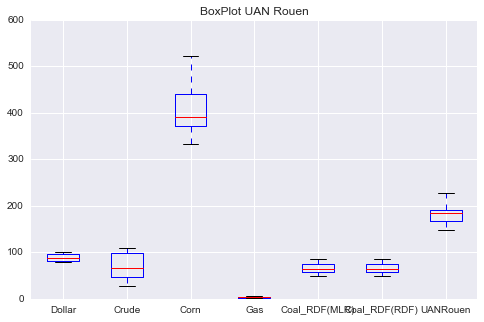

In [50]:
plt.show(rouen.plot(kind='box', figsize=(8,5),title=('BoxPlot UAN Rouen')))

In [51]:
rouen.corr()
#gas and coal most correlated

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UANRouen
Dollar,1.000000,-0.964485,-0.663102,-0.905450,-0.875990,-0.876971,-0.545666
Crude,-0.964485,1.000000,0.646934,0.899767,0.878869,0.876966,0.519475
Corn,-0.663102,0.646934,1.000000,0.614611,0.692592,0.690578,0.306663
Gas,-0.905450,0.899767,0.614611,1.000000,0.803247,0.799158,0.779276
Coal_RDF(MLR),-0.875990,0.878869,0.692592,0.803247,1.000000,0.998992,0.632418
Coal_RDF(RDF),-0.876971,0.876966,0.690578,0.799158,0.998992,1.000000,0.610696
UANRouen,-0.545666,0.519475,0.306663,0.779276,0.632418,0.610696,1.000000


In [52]:
rouen = rouen.dropna()
rouennew = np.array(rouen)
rouennew = pd.DataFrame(rouennew)
rouennew.columns = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','UANRouen']
rouennew.head(2)

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UANRouen
0,6/13/2014,80.576,106.17,443,4.748,72.15,72.15,183
1,6/20/2014,80.372,106.83,448.25,4.552,72,72,186


In [53]:
#MLR all with coal_RDF(MLR)
X = rouen[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']]
Y = rouen[['UANRouen']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               UANRouen   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     62.79
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           9.06e-17
Time:                        12:17:34   Log-Likelihood:                -142.23
No. Observations:                  42   AIC:                             296.5
Df Residuals:                      36   BIC:                             306.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          -220.8845    226.130     -0.977      0.335      -679.497   237.728
Dollar            1.8008      1.694      1.063      0.295        -1.636     5.237
Crude            -1.7163      0.273     -6.293      0.000        -2.269    -1.163
Corn             -0.1856      0.055     -3.397      0.002        -0.296    -0.075
Gas              36.8629      4.020      9.170      0.000        28.710    45.016
Coal_RDF(MLR)     5.0454      1.433      3.521      0.001         2.139     7.952
==============================================================================
Omnibus:                        0.072   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.965   Jarque-Bera (JB):                0.023
Skew:                           0.002   Prob(JB):                        0.989
Kurtosis:                       2.886   Cond. No.                     7.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#corn gas coal
X = rouen[['Corn','Gas','Coal_RDF(MLR)']]
Y = rouen[['UANRouen']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               UANRouen   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     30.83
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           2.82e-10
Time:                        12:21:38   Log-Likelihood:                -164.08
No. Observations:                  42   AIC:                             336.2
Df Residuals:                      38   BIC:                             343.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           193.1129     37.370      5.168      0.000       117.461   268.764
Corn              0.0128      0.080      0.160      0.874        -0.149     0.175
Gas              34.4196      5.517      6.239      0.000        23.251    45.588
Coal_RDF(MLR)    -2.1430      0.667     -3.215      0.003        -3.492    -0.794
==============================================================================
Omnibus:                       23.090   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.622
Skew:                           1.522   Prob(JB):                     1.51e-09
Kurtosis:                       6.735   Cond. No.                     7.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
#rdf all using coal_rdf(mlr)
X=rouennew[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']].values
y=rouennew['UANRouen'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(29, 5)

In [59]:
rdf_model_rouen = fit_predict_model(X_train,y_train)
print (rdf_model_rouen.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [60]:
X=rouennew[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)']].values
y=rouennew['UANRouen'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#corn isn't important

MSE train: 4.679, test: 21.380
R^2 train: 0.989, test: 0.965
[ 0.2145914   0.21566967  0.02334859  0.29367033  0.25272001]


In [61]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
rouennew['Rouen_Pred_RDF(MLR)'] = urea_predicted3
rdf_error3 = (abs(rouennew['Rouen_Pred_RDF(MLR)'] - rouennew['UANRouen'])/rouennew['UANRouen'])*100
rouennew['RDF(MLR)_Error'] = rdf_error3

mlrall = -220.8845 + (rouennew['Dollar']*1.8008) - (rouennew['Crude']*1.7163) - (rouennew['Corn']*0.1856) + (rouennew['Gas']*36.8629) + (rouennew['Coal_RDF(MLR)']*5.0454)
rouennew['Rouen_Pred_MLRAll(MLR)'] = mlrall
mlr_error4 = (abs(rouennew['Rouen_Pred_MLRAll(MLR)']-rouennew['UANRouen'])/rouennew['UANRouen'])*100
rouennew['MLRAll(MLR)_Error'] = mlr_error4

print("Average RDF(MLR) error is: %.3f" % (rdf_error3.mean())) 
print("Average MLRAll(MLR) error is: %.3f" % (mlr_error4.mean()))
rouennew

Average RDF(MLR) error is: 1.169
Average MLRAll(MLR) error is: 3.076


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UANRouen,Rouen_Pred_RDF(MLR),RDF(MLR)_Error,Rouen_Pred_MLRAll(MLR),MLRAll(MLR)_Error
0,6/13/2014,80.576,106.17,443,4.748,72.15,72.15,183,184.980000,1.08197,198.827,8.64866
1,6/20/2014,80.372,106.83,448.25,4.552,72,72,186,186.233333,0.125448,188.371,1.27451
2,6/27/2014,80.039,105.04,442.25,4.389,71.9,71.9,185,185.360000,0.194595,185.444,0.239734
3,7/4/2014,80.269,103.51,409.5,4.395,69.85,69.85,183,185.820000,1.54098,184.44,0.78696
4,7/11/2014,80.187,100.3,378.25,4.136,69.65,69.65,184,184.153333,0.0833333,185.045,0.568057
5,7/18/2014,80.524,101.95,378.5,3.955,69.1,69.1,184,184.133333,0.0724638,173.327,5.80074
6,7/25/2014,81.029,100.87,371.75,3.787,69.3,69.3,184,184.620000,0.336957,172.159,6.43556
7,8/1/2014,81.302,96.94,362.25,3.822,68.95,68.95,183,184.186667,0.648452,180.683,1.26625
8,8/8/2014,81.389,96.84,363.5,3.98,70.55,70.55,183,183.793333,0.433515,194.676,6.38034
9,8/15/2014,81.424,95.32,377,3.807,70.25,70.25,184,184.940000,0.51087,186.951,1.60399


In [62]:
#rdf all using coal_RDF(rdf)
X=rouennew[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']].values
y=rouennew['UANRouen'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(29, 5)

In [66]:
rdf_model_rouen2 = fit_predict_model(X_train,y_train)
print (rdf_model_rouen2.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [67]:
X=rouennew[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)']].values
y=rouennew['UANRouen'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 3.750, test: 24.514
R^2 train: 0.992, test: 0.960
[ 0.16376155  0.22075876  0.04822493  0.349446    0.21780876]


In [68]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
rouennew['Rouen_Pred_RDF(RDF)'] = urea_predicted3
rdf_error3 = (abs(rouennew['Rouen_Pred_RDF(RDF)'] - rouennew['UANRouen'])/rouennew['UANRouen'])*100
rouennew['RDF(RDF)_Error'] = rdf_error3
print("Average RDF(RDF) error is: %.3f" % (rdf_error3.mean())) 
rouennew

Average RDF(RDF) error is: 1.147


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UANRouen,Rouen_Pred_RDF(MLR),RDF(MLR)_Error,Rouen_Pred_MLRAll(MLR),MLRAll(MLR)_Error,Rouen_Pred_RDF(RDF),RDF(RDF)_Error
0,6/13/2014,80.576,106.17,443,4.748,72.15,72.15,183,184.980000,1.08197,198.827,8.64866,185.051667,1.12113
1,6/20/2014,80.372,106.83,448.25,4.552,72,72,186,186.233333,0.125448,188.371,1.27451,186.250000,0.134409
2,6/27/2014,80.039,105.04,442.25,4.389,71.9,71.9,185,185.360000,0.194595,185.444,0.239734,185.391667,0.211712
3,7/4/2014,80.269,103.51,409.5,4.395,69.85,69.85,183,185.820000,1.54098,184.44,0.78696,186.141667,1.71676
4,7/11/2014,80.187,100.3,378.25,4.136,69.65,69.65,184,184.153333,0.0833333,185.045,0.568057,184.171667,0.0932971
5,7/18/2014,80.524,101.95,378.5,3.955,69.1,69.1,184,184.133333,0.0724638,173.327,5.80074,184.171667,0.0932971
6,7/25/2014,81.029,100.87,371.75,3.787,69.3,69.3,184,184.620000,0.336957,172.159,6.43556,184.010000,0.00543478
7,8/1/2014,81.302,96.94,362.25,3.822,68.95,68.95,183,184.186667,0.648452,180.683,1.26625,183.641667,0.350638
8,8/8/2014,81.389,96.84,363.5,3.98,70.55,70.55,183,183.793333,0.433515,194.676,6.38034,183.371667,0.203097
9,8/15/2014,81.424,95.32,377,3.807,70.25,70.25,184,184.940000,0.51087,186.951,1.60399,184.200000,0.108696


In [69]:
#rdf no corn
X=rouennew[['Dollar','Crude','Gas','Coal_RDF(RDF)']].values
y=rouennew['UANRouen'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape

(29, 4)

In [70]:
rdf_model_rouen3 = fit_predict_model(X_train,y_train)
print (rdf_model_rouen3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [71]:
X=rouennew[['Dollar','Crude','Gas','Coal_RDF(RDF)']].values
y=rouennew['UANRouen'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 3.758, test: 17.592
R^2 train: 0.992, test: 0.971
[ 0.27466427  0.2187976   0.28150855  0.22502957]


In [72]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
rouennew['Rouen_Pred_RDF(RDF)noCorn'] = urea_predicted3
rdf_error3 = (abs(rouennew['Rouen_Pred_RDF(RDF)noCorn'] - rouennew['UANRouen'])/rouennew['UANRouen'])*100
rouennew['RDF(RDF)noCorn_Error'] = rdf_error3
print("Average RDF(RDF) no corn error is: %.3f" % (rdf_error3.mean())) 
rouennew
#better to not include corn

Average RDF(RDF) no corn error is: 1.084


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),UANRouen,Rouen_Pred_RDF(MLR),RDF(MLR)_Error,Rouen_Pred_MLRAll(MLR),MLRAll(MLR)_Error,Rouen_Pred_RDF(RDF),RDF(RDF)_Error,Rouen_Pred_RDF(RDF)noCorn,RDF(RDF)noCorn_Error
0,6/13/2014,80.576,106.17,443,4.748,72.15,72.15,183,184.980000,1.08197,198.827,8.64866,185.051667,1.12113,183.653333,0.357013
1,6/20/2014,80.372,106.83,448.25,4.552,72,72,186,186.233333,0.125448,188.371,1.27451,186.250000,0.134409,185.113333,0.476703
2,6/27/2014,80.039,105.04,442.25,4.389,71.9,71.9,185,185.360000,0.194595,185.444,0.239734,185.391667,0.211712,184.246667,0.407207
3,7/4/2014,80.269,103.51,409.5,4.395,69.85,69.85,183,185.820000,1.54098,184.44,0.78696,186.141667,1.71676,184.411667,0.771403
4,7/11/2014,80.187,100.3,378.25,4.136,69.65,69.65,184,184.153333,0.0833333,185.045,0.568057,184.171667,0.0932971,184.311667,0.169384
5,7/18/2014,80.524,101.95,378.5,3.955,69.1,69.1,184,184.133333,0.0724638,173.327,5.80074,184.171667,0.0932971,184.051667,0.0280797
6,7/25/2014,81.029,100.87,371.75,3.787,69.3,69.3,184,184.620000,0.336957,172.159,6.43556,184.010000,0.00543478,184.431667,0.234601
7,8/1/2014,81.302,96.94,362.25,3.822,68.95,68.95,183,184.186667,0.648452,180.683,1.26625,183.641667,0.350638,184.325000,0.724044
8,8/8/2014,81.389,96.84,363.5,3.98,70.55,70.55,183,183.793333,0.433515,194.676,6.38034,183.371667,0.203097,183.626667,0.342441
9,8/15/2014,81.424,95.32,377,3.807,70.25,70.25,184,184.940000,0.51087,186.951,1.60399,184.200000,0.108696,185.611667,0.875906


In [ ]:
#add predictions part

In [ ]:
#make new predictions here for future

In [ ]:
#combine frames of original and predicted

In [ ]:
#save combined file to csv

In [ ]:
#split combined into monthly chunks

In [ ]:
#graph all models and then put in daily form

### Get rid of coal since many data points missing

In [73]:
rouen1 = original[['Date','Dollar','Crude','Corn','Gas','UANRouen']]
print(rouen1.shape)
rouen1 = rouen1.dropna()
rouennew1 = np.array(rouen1)
rouennew1 = pd.DataFrame(rouennew1)
rouennew1.columns = ['Date','Dollar','Crude','Corn','Gas','UANRouen']
rouennew1.head(2)

(685, 6)


,Date,Dollar,Crude,Corn,Gas,UANRouen
0,6/13/2014,80.576,106.17,443,4.748,183
1,6/16/2014,80.471,106.3,436.75,4.718,183


In [75]:
from datetime import datetime
rouennew1['Date'] = pd.to_datetime(rouennew1['Date'])
date = rouennew1['Date']
rouennew1.dtypes

Date        datetime64[ns]
Dollar              object
Crude               object
Corn                object
Gas                 object
UANRouen            object
dtype: object

In [74]:
rouen1.corr()
#gas highly correlated, not so much with dollar and crude

,Dollar,Crude,Corn,Gas,UANRouen
Dollar,1.000000,-0.984029,-0.268903,-0.900965,-0.545666
Crude,-0.984029,1.000000,0.206043,0.908216,0.519475
Corn,-0.268903,0.206043,1.000000,0.338291,0.306663
Gas,-0.900965,0.908216,0.338291,1.000000,0.779276
UANRouen,-0.545666,0.519475,0.306663,0.779276,1.000000


In [76]:
#mlr all
X = rouen1[['Dollar','Crude','Corn','Gas']]
Y= rouen1[['UANRouen']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               UANRouen   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     251.0
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           1.18e-74
Time:                        13:37:03   Log-Likelihood:                -698.73
No. Observations:                 195   AIC:                             1407.
Df Residuals:                     190   BIC:                             1424.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        501.1542     66.735      7.510      0.000       369.518   632.791
Dollar        -3.2626      0.586     -5.571      0.000        -4.418    -2.107
Crude         -1.6970      0.153    -11.113      0.000        -1.998    -1.396
Corn          -0.1393      0.032     -4.390      0.000        -0.202    -0.077
Gas           42.1733      1.703     24.764      0.000        38.814    45.533
==============================================================================
Omnibus:                       16.503   Durbin-Watson:                   0.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.126
Skew:                           0.291   Prob(JB):                     1.17e-09
Kurtosis:                       5.173   Cond. No.                     4.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
#only gas (corn barely affects R^2), crude and dollar when alone R^ around .2
X = rouen1[['Gas']]
Y= rouen1[['UANRouen']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               UANRouen   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     298.4
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           4.96e-41
Time:                        13:39:19   Log-Likelihood:                -786.81
No. Observations:                 195   AIC:                             1578.
Df Residuals:                     193   BIC:                             1584.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        122.6697      3.681     33.327      0.000       115.410   129.929
Gas           17.8142      1.031     17.275      0.000        15.780    19.848
==============================================================================
Omnibus:                       55.729   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.141
Skew:                           1.428   Prob(JB):                     4.01e-23
Kurtosis:                       5.129   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
#rdf all
X = rouennew1[['Dollar','Crude','Corn','Gas']].values
y = rouennew1['UANRouen'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [85]:
rdf_model_rouen4 = fit_predict_model(X_train,y_train)
print (rdf_model_rouen4.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [87]:
X= rouennew1[['Dollar','Crude','Corn','Gas']].values
y= rouennew1['UANRouen'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#get rid of corn since not important

MSE train: 0.977, test: 5.382
R^2 train: 0.998, test: 0.990
[ 0.44260305  0.31036891  0.00475653  0.24227151]


In [89]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
rouennew1['Rouen_Pred_RDFAll'] = urea_predicted3
rdf_error3 = (abs(rouennew1['Rouen_Pred_RDFAll'] - rouennew1['UANRouen'])/rouennew1['UANRouen'])*100
rouennew1['RDFAll_Error'] = rdf_error3

mlrall = 501.1542 - (rouennew1['Dollar']*3.2626) - (rouennew1['Crude']*1.6970) - (rouennew1['Corn']*0.1393) + (rouennew1['Gas']*42.1733) 
rouennew1['Rouen_Pred_MLRAll'] = mlrall
mlr_error4 = (abs(rouennew1['Rouen_Pred_MLRAll'] - rouennew1['UANRouen'])/rouennew1['UANRouen'])*100
rouennew1['MLRAll_Error'] = mlr_error4

print("Average RDFAll error is: %.3f" % (rdf_error3.mean())) 
print("Average MLRAll error is: %.3f" % (mlr_error4.mean()))
rouennew1

Average RDFAll error is: 0.391
Average MLRAll error is: 3.440


,Date,Dollar,Crude,Corn,Gas,UANRouen,Rouen_Pred_RDFAll,RDFAll_Error,Rouen_Pred_MLRAll,MLRAll_Error
0,2014-06-13,80.576,106.17,443,4.748,183,183.606667,0.331512,196.625,7.44556
1,2014-06-16,80.471,106.3,436.75,4.718,183,183.493333,0.269581,196.353,7.2966
2,2014-06-17,80.629,105.87,434,4.722,183,183.473333,0.258652,197.119,7.71517
3,2014-06-18,80.584,105.59,435.5,4.675,186,185.173333,0.444444,195.55,5.13421
4,2014-06-19,80.317,106.05,444.25,4.603,186,185.520000,0.258065,191.385,2.89504
5,2014-06-20,80.372,106.83,448.25,4.552,186,185.506667,0.265233,187.174,0.630989
6,2014-06-23,80.272,105.42,439,4.468,186,185.700000,0.16129,187.639,0.880988
7,2014-06-24,80.327,105.32,436.75,4.556,186,185.700000,0.16129,191.654,3.03955
8,2014-06-25,80.225,105.72,435.75,4.569,185,185.166667,0.0900901,191.995,3.78114
9,2014-06-26,80.22,105.11,439,4.441,185,185.126667,0.0684685,187.196,1.18686


In [90]:
#rdf no corn
X = rouennew1[['Dollar','Crude','Gas']].values
y = rouennew1['UANRouen'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [93]:
rdf_model_rouen5 = fit_predict_model(X_train,y_train)
print (rdf_model_rouen5.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [94]:
X= rouennew1[['Dollar','Crude','Gas']].values
y= rouennew1['UANRouen'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 1.072, test: 5.688
R^2 train: 0.998, test: 0.989
[ 0.43020534  0.29139922  0.27839543]


In [95]:
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
rouennew1['Rouen_Pred_RDFnoCorn'] = urea_predicted3
rdf_error3 = (abs(rouennew1['Rouen_Pred_RDFnoCorn'] - rouennew1['UANRouen'])/rouennew1['UANRouen'])*100
rouennew1['RDFnoCorn_Error'] = rdf_error3
print("Average RDF no corn error is: %.3f" % (rdf_error3.mean()))
rouennew1
#don't need corn, still good model

Average RDF no corn error is: 0.406


,Date,Dollar,Crude,Corn,Gas,UANRouen,Rouen_Pred_RDFAll,RDFAll_Error,Rouen_Pred_MLRAll,MLRAll_Error,Rouen_Pred_RDFnoCorn,RDFnoCorn_Error
0,2014-06-13,80.576,106.17,443,4.748,183,183.606667,0.331512,196.625,7.44556,183.206667,0.112933
1,2014-06-16,80.471,106.3,436.75,4.718,183,183.493333,0.269581,196.353,7.2966,183.333333,0.182149
2,2014-06-17,80.629,105.87,434,4.722,183,183.473333,0.258652,197.119,7.71517,183.333333,0.182149
3,2014-06-18,80.584,105.59,435.5,4.675,186,185.173333,0.444444,195.55,5.13421,184.786667,0.65233
4,2014-06-19,80.317,106.05,444.25,4.603,186,185.520000,0.258065,191.385,2.89504,185.473333,0.283154
5,2014-06-20,80.372,106.83,448.25,4.552,186,185.506667,0.265233,187.174,0.630989,185.500000,0.268817
6,2014-06-23,80.272,105.42,439,4.468,186,185.700000,0.16129,187.639,0.880988,185.513333,0.261649
7,2014-06-24,80.327,105.32,436.75,4.556,186,185.700000,0.16129,191.654,3.03955,185.806667,0.103943
8,2014-06-25,80.225,105.72,435.75,4.569,185,185.166667,0.0900901,191.995,3.78114,185.186667,0.100901
9,2014-06-26,80.22,105.11,439,4.441,185,185.126667,0.0684685,187.196,1.18686,184.966667,0.018018


In [ ]:
#add predictions part

In [ ]:
#new predictions made

In [ ]:
#combine frames of original and predictions

In [ ]:
#save combined file to csv

In [ ]:
#split combined into monthly format

In [ ]:
#graph all models and then put in daily format